<br><h1><center><em>An Exploratory Data Analysis of the Relationship Between Certian Fish Characteristics and Weight with Regression Analysis</em></center></h1><br>

<center><img src="reg_al.png" width=800></center>
<strong>Credit</strong>: Mehta, D. (2023, January 31). What is regression analysis? types, importance, and benefits. G2. https://www.g2.com/articles/regression-analysis 

### Objectives :

 In this project, we look to explore the relationship between certian fish characteristics and weight. We will look at how different measurements of different categories of fish impact weight. We will perform several types of regression analysis on the cleaned dataset.

- [X] Import Data
- [X] Clean Data
- [X] Perform Exploratory Analysis on Data
- [X] Draw Conclusion from Analyzed Data
- [X] Train Regression Models on Data
- [X] Plot Predicted and actual targets

In [56]:
# common imports
import numpy as np # linear algebra
import pandas as pd # data manipulation
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from collections import Counter # method for counting values
import scipy.stats as stats

import sys
sys.path.append('C:/Users/aspar/PycharmProjects/')
%matplotlib inline

In [57]:
# import custom class
from Project_test.DataWrangler import wrangler

In [58]:
# create DataFrame
df = wrangler(pd.read_csv('fish.csv'))
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [59]:
# custom method dataframe_analysis() outputs desprictive statistics for dataframe, as well as null values and duplicated rows
df.dataframe_anaylsis()

Descriptive Statistics of Numerical Data:

         count        mean         std     min        25%       50%       75%  \
Weight   159.0  398.326415  357.978317  0.0000  120.00000  273.0000  650.0000   
Length1  159.0   26.247170    9.996441  7.5000   19.05000   25.2000   32.7000   
Length2  159.0   28.415723   10.716328  8.4000   21.00000   27.3000   35.5000   
Length3  159.0   31.227044   11.610246  8.8000   23.15000   29.4000   39.6500   
Height   159.0    8.970994    4.286208  1.7284    5.94480    7.7860   12.3659   
Width    159.0    4.417486    1.685804  1.0476    3.38565    4.2485    5.5845   

              max  
Weight   1650.000  
Length1    59.000  
Length2    63.400  
Length3    68.000  
Height     18.957  
Width       8.142  
--------------------------------------------------------------
Descriptive Statistics of Categorical Data:

        count unique    top freq
Species   159      7  Perch   56
--------------------------------------------------------------
Check if any

<div class="alert alert-block alert-info">
<b>Analysis:</b> At first glance, we see that we have no null. Though there are no null values, the weight column has a row that has a value of zero which is impossible.  
</div>

In [60]:
# find the row that contains 0 for the recorded weight
df[(df['Weight'] == 0)]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [61]:
# copy dataframe
fish_df = df.copy(deep=True)
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [62]:
# replace the 0 value in the weight column with a null value
fish_df.iloc[[40]] = fish_df.iloc[[40]].replace({0.0 : np.nan})

In [63]:
# now check for null values in columns
fish_df.isnull().sum()

Species    0
Weight     1
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [64]:
# use custom method to impute missing values in DataFrame
fish_df.complete_imputation()

In [65]:
# All null values are imputed
fish_df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [66]:
# rename columns in DataFrame
fish_df.columns = ["species", "mass", "vertical_(cm)", "diagonal_(cm)", "cross_(cm)", "height_(cm)", "width_(cm)"]

In [67]:
fish_df.columns

Index(['species', 'mass', 'vertical_(cm)', 'diagonal_(cm)', 'cross_(cm)',
       'height_(cm)', 'width_(cm)'],
      dtype='object')

In [68]:
# change the datatype of columns that are an object to category
fish_df.category_datatype()

In [69]:
# show how many numerical and categorical colmns there are
category_columns, numerical_columns, category_with_hi_cardinality = fish_df.column_analysis()

Observations : 159
Variables : 7
Categorical Columns : 1
Numerical Columns : 6
Categorical Columns with High Cardinality : 0
Numerical Columns that are Categorical: 0


In [70]:
for col in category_columns:
    fish_df.categorical_column_summary(fish_df, col)

           species  Ratio
Perch           56  35.22
Bream           35  22.01
Roach           20  12.58
Pike            17  10.69
Smelt           14   8.81
Parkki          11   6.92
Whitefish        6   3.77
----------------------------------------


<div class="alert alert-block alert-info">
<b>Analysis:</b> Combined, Perch and Bream make up close to 50% of the fish at the fish market. 
</div>

In [71]:
for col in numerical_columns:
    fish_df.numerical_column_summary(fish_df, col)

              mass
count   159.000000
mean    400.847468
std     356.564044
min       5.900000
5%        9.890000
10%      38.400000
20%     110.000000
30%     145.000000
40%     189.800000
50%     290.000000
60%     398.677975
70%     549.600000
80%     700.000000
90%     930.000000
95%    1000.000000
99%    1571.000000
max    1650.000000
____________________________________________________
       vertical_(cm)
count     159.000000
mean       26.247170
std         9.996441
min         7.500000
5%         11.300000
10%        13.440000
20%        18.320000
30%        20.000000
40%        22.020000
50%        25.200000
60%        28.500000
70%        31.620000
80%        34.680000
90%        38.200000
95%        41.190000
99%        56.000000
max        59.000000
____________________________________________________
       diagonal_(cm)
count     159.000000
mean       28.415723
std        10.716328
min         8.400000
5%         11.800000
10%        14.620000
20%        20.000000
30%   

<div class="alert alert-block alert-info">
<b>Analysis:</b> The average mass across the fish species is around 400. This average can be used later when we evaluate the error of the regression models.   
</div>

In [72]:
for col in category_columns:
    fish_df.target_cross_analysis_cat('mass', col)

           TARGET MEAN
species               
Pike        718.705882
Bream       617.828571
Whitefish   531.000000
Perch       382.239286
Roach       172.092373
Parkki      154.818182
Smelt        11.178571


<div class="alert alert-block alert-info">
<b>Analysis:</b> On average Pike fish weight more than any of the other fish species. Smelt fish on average weigh significally less than all the other fish species.   
</div>

In [73]:
for col in numerical_columns:
    if col == 'mass':
        continue
    else:
        fish_df.target_cross_analysis_num('mass', col)

        vertical_(cm)
mass                 
1650.0          59.00
1600.0          56.00
1550.0          56.00
1250.0          52.00
1100.0          39.55
...               ...
8.7             10.80
7.5             10.00
7.0             10.10
6.7              9.30
5.9              7.50

[101 rows x 1 columns]
        diagonal_(cm)
mass                 
1650.0           63.4
1600.0           60.0
1550.0           60.0
1250.0           56.0
1100.0           42.5
...               ...
8.7              11.3
7.5              10.5
7.0              10.6
6.7               9.8
5.9               8.4

[101 rows x 1 columns]
        cross_(cm)
mass              
1650.0       68.00
1600.0       64.00
1550.0       64.00
1250.0       59.70
1100.0       45.05
...            ...
8.7          12.60
7.5          11.60
7.0          11.60
6.7          10.80
5.9           8.80

[101 rows x 1 columns]
        height_(cm)
mass               
1650.0     10.81200
1600.0      9.60000
1550.0      9.60000
1250.0   

<div class="alert alert-block alert-info">
<b>Analysis:</b> For the most part the various measurements of the fish correlate to the masses of the fish. 
</div>

<br><h1><center><em>Exploratory Data Analysis (EDA)</em></center></h1><br>

In [74]:
# import custom class for graphing data
from Project_test.DataWrangler import graphs
graph = graphs()

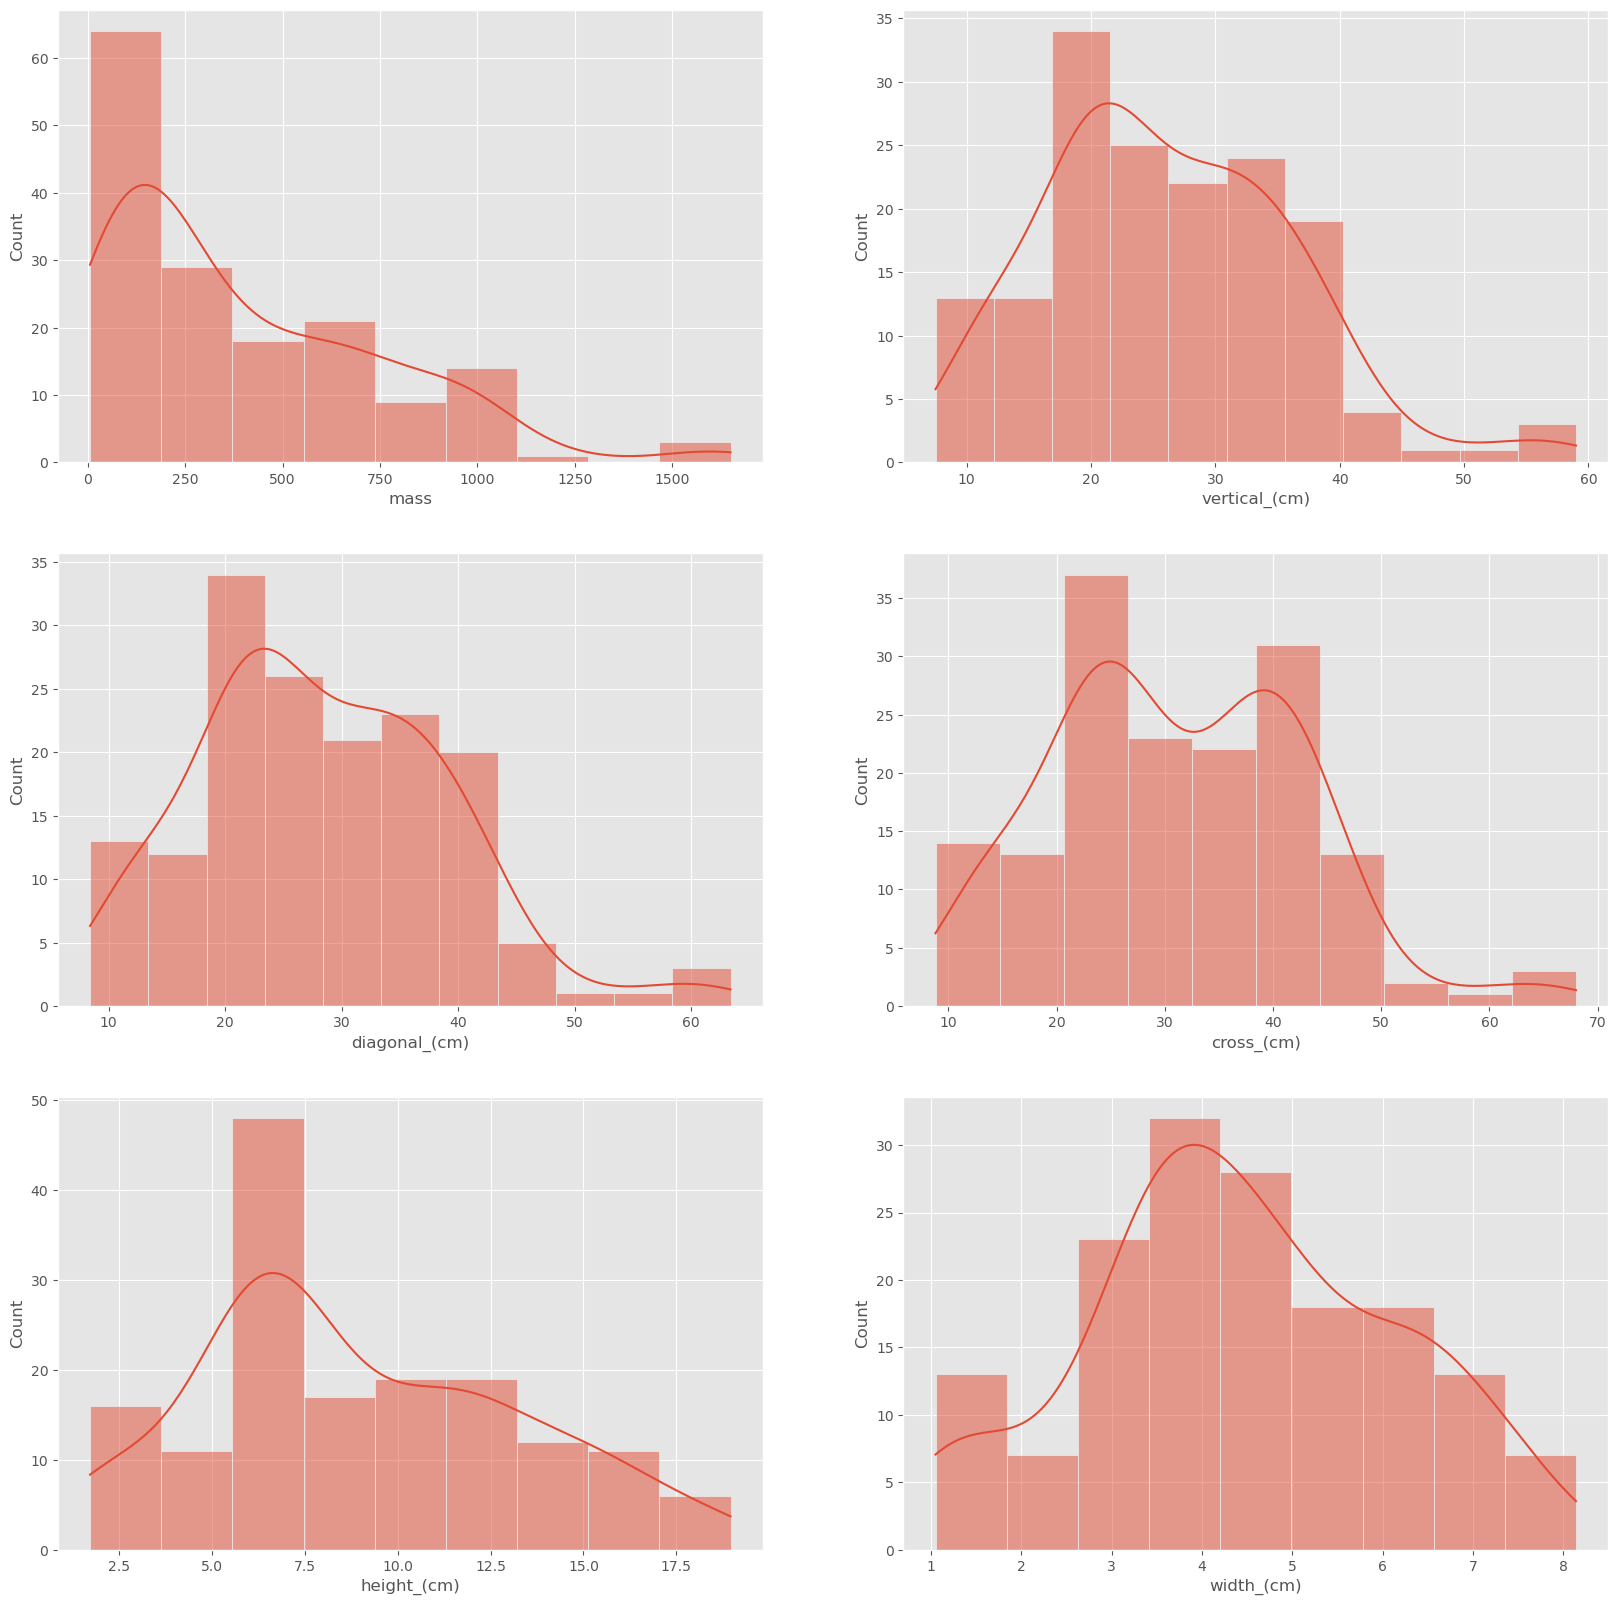

In [75]:
graph.histogram_subplots(fish_df, 'ggplot', 3,2)

<div class="alert alert-block alert-info">
<b>Analysis:</b> Most of the fish have a mass under 500, with the vertical, diagonal, and cross measurements being around 20-40 centimeters. 
</div>

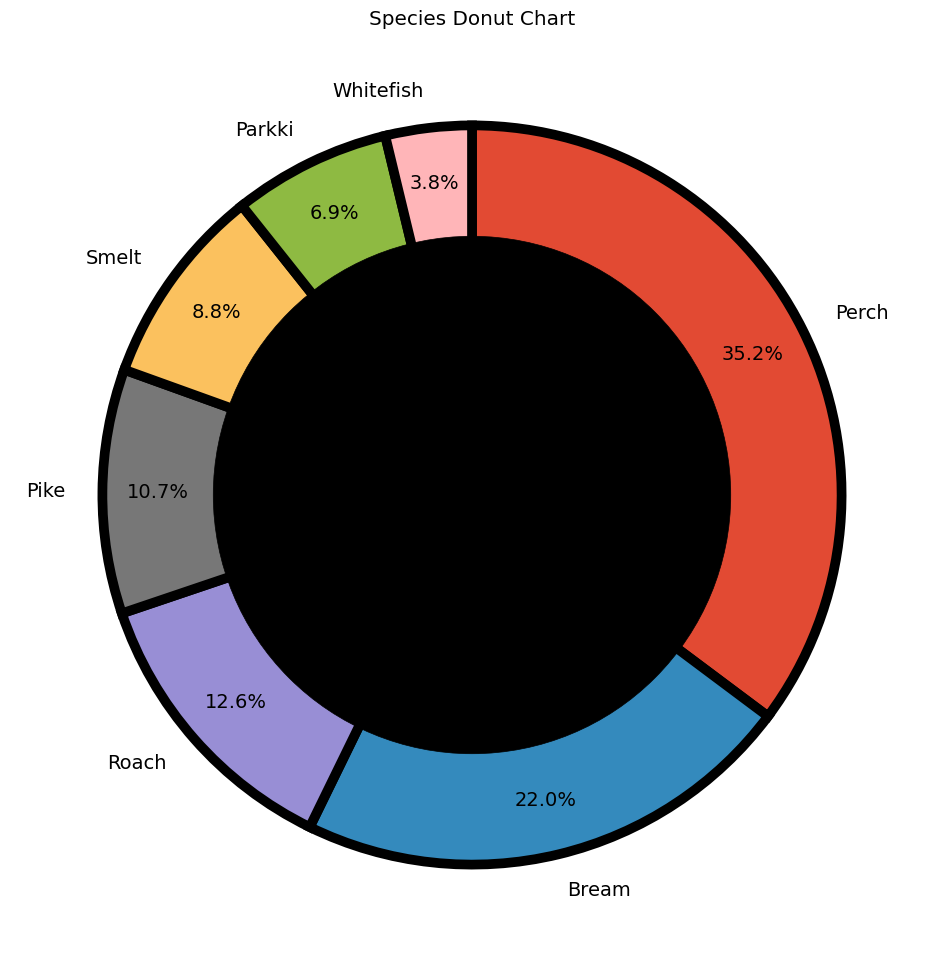

In [76]:
graph.donut_pie_chart(fish_df, 'species', 'ggplot')

<div class="alert alert-block alert-info">
<b>Analysis:</b> There are more Perch fish at the market than any of the other species of fish. 
</div>

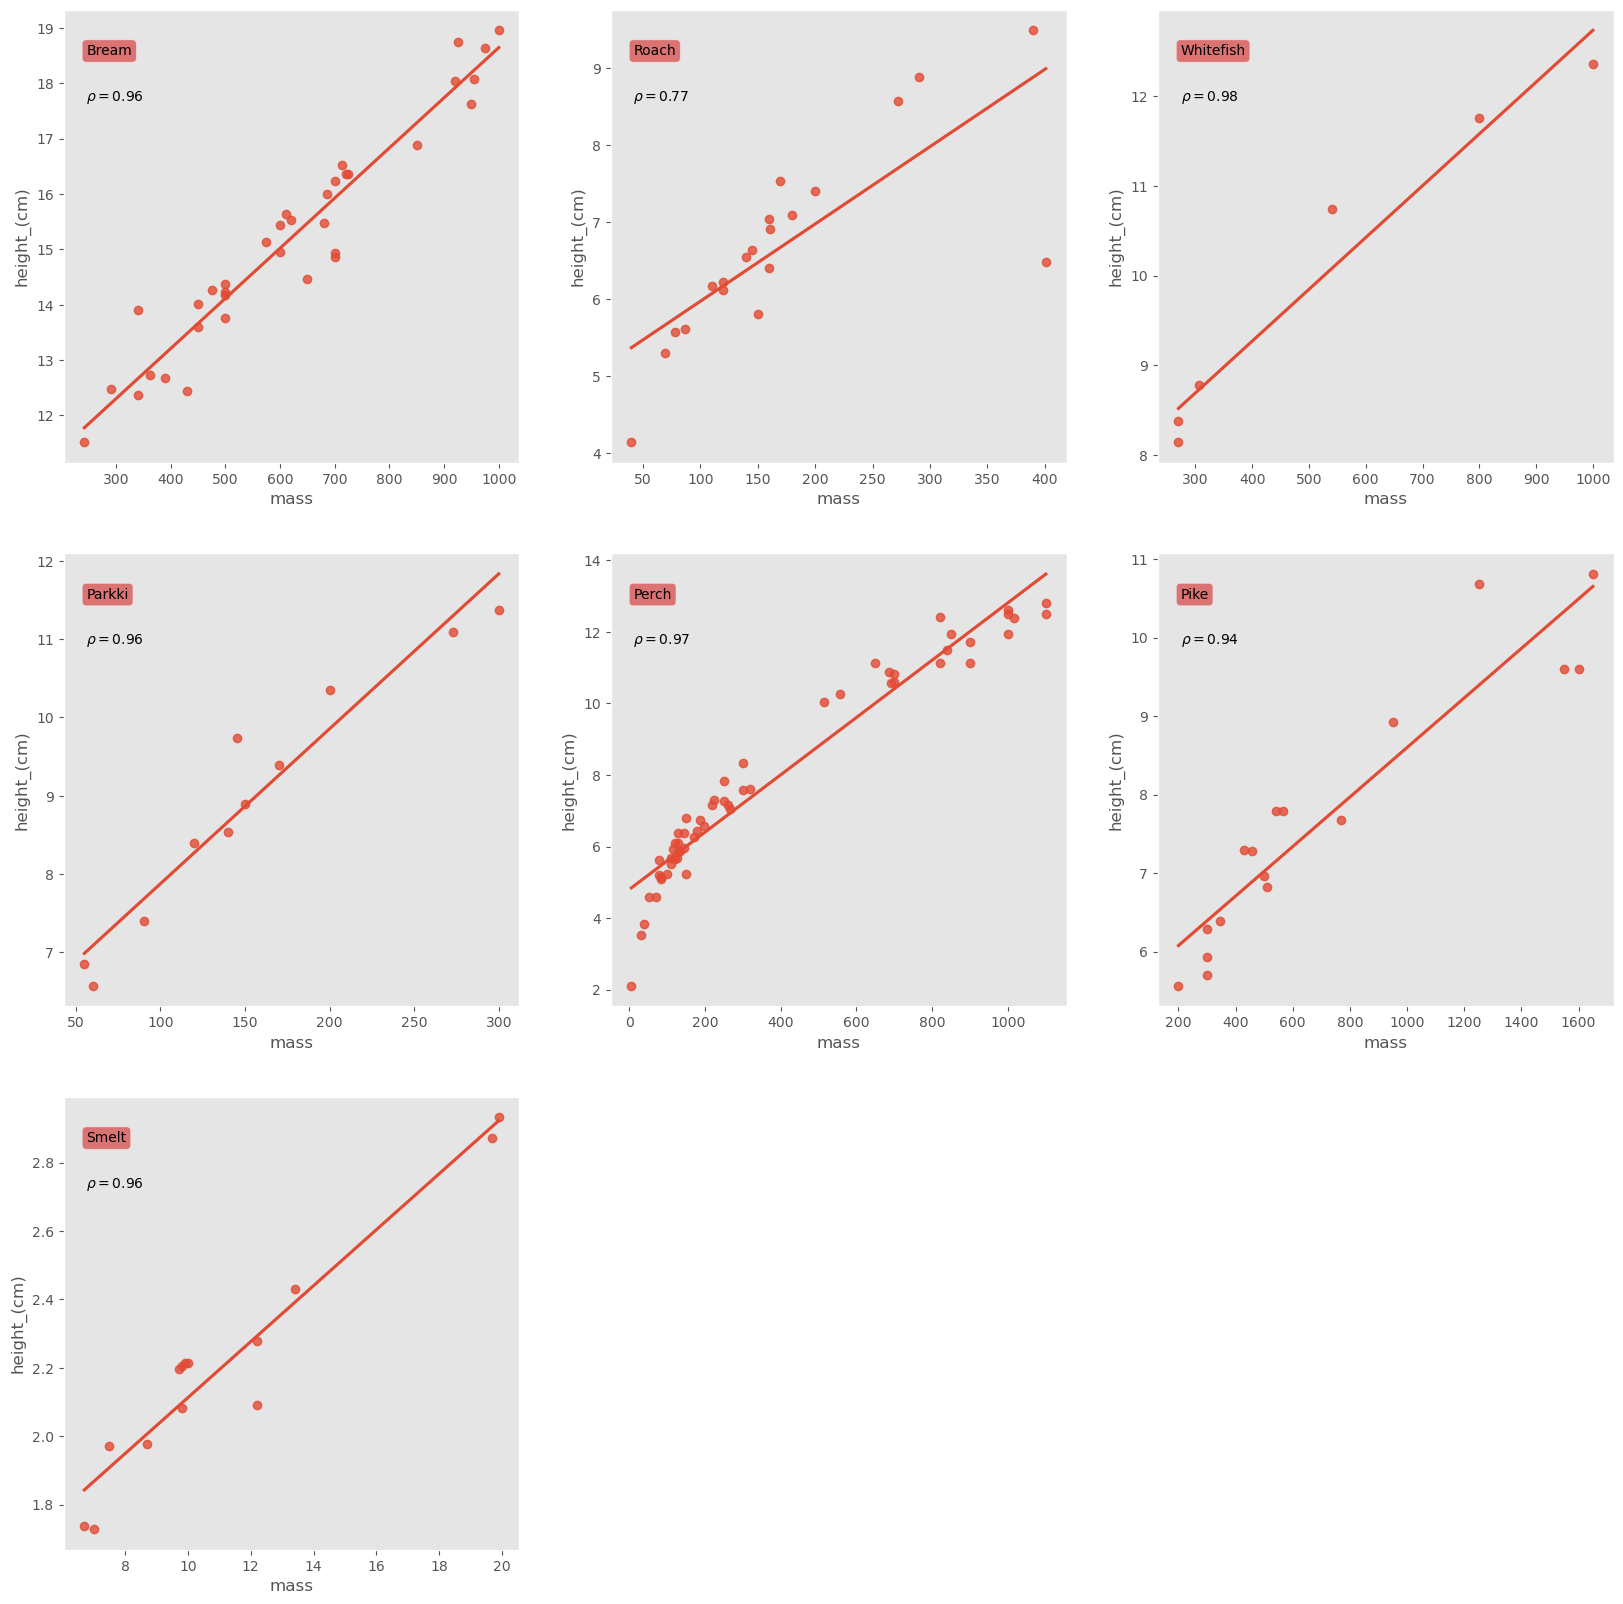

In [77]:
graph.regression_subplots(fish_df, 'species', 'mass', 'height_(cm)', 'ggplot', 3,3)

<div class="alert alert-block alert-info">
<b>Analysis:</b> We observe a high correlation between mass and height in all but one one species of fish. For every species of fish other than Roach the Pearson Correrlation Coefficient (Ρ) was over 0.9, which suggests a positive high correlation. Though the correlation for Roach was under 0.9, there was still a moderate positive correlation with the Pearson Correrlation Coefficient (Ρ) being over 0.7.
</div>

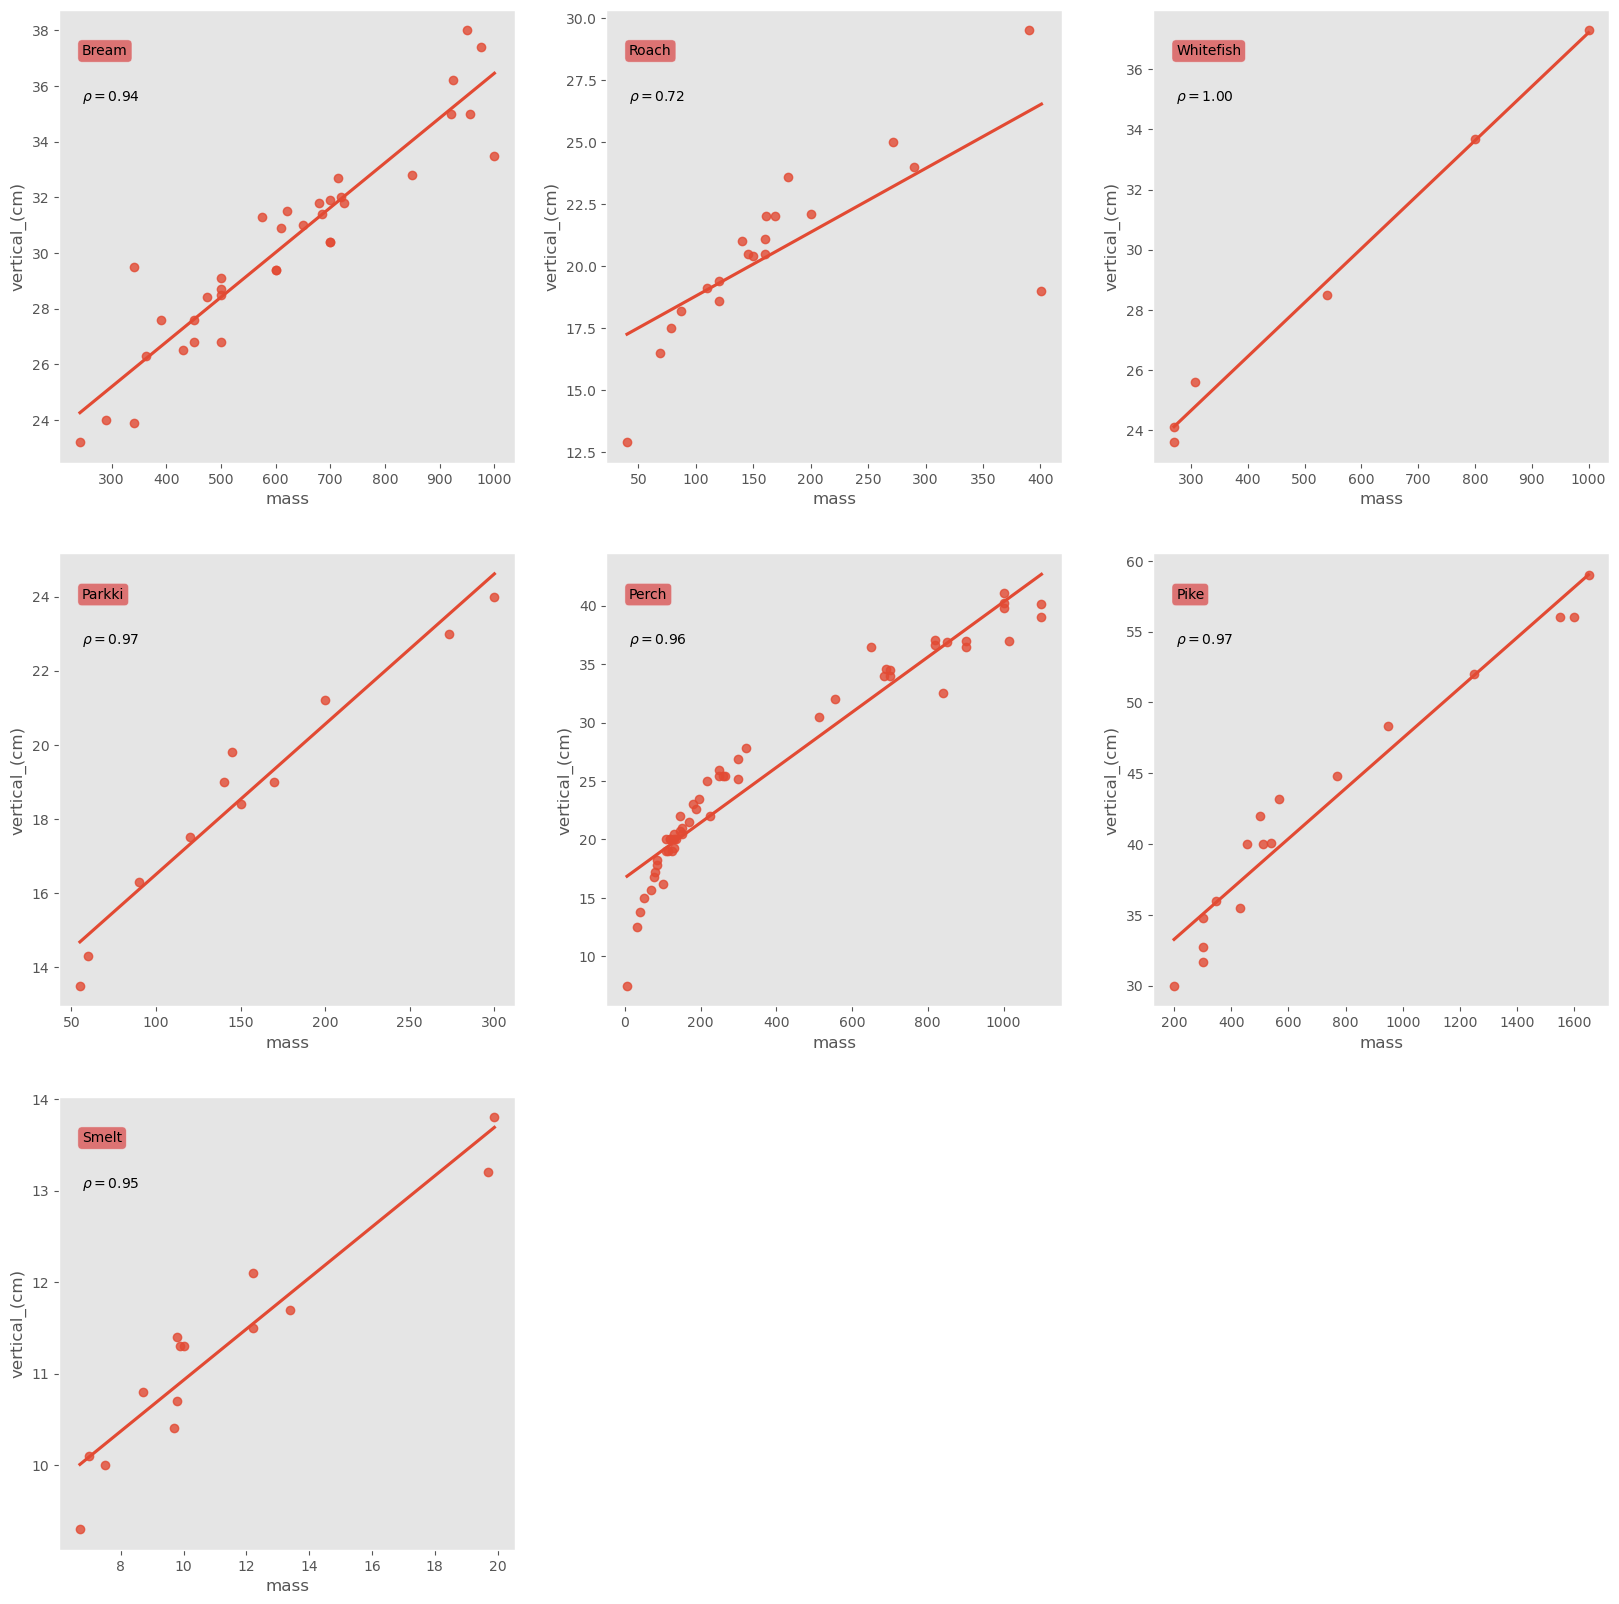

In [78]:
graph.regression_subplots(fish_df, 'species', 'mass', 'vertical_(cm)', 'ggplot', 3,3)

<div class="alert alert-block alert-info">
<b>Analysis:</b> We observe a high correlation between mass and vertical measurement in all but one one species of fish. For every species of fish other than Roach the Pearson Correrlation Coefficient (Ρ) was over 0.9, which suggests a positive high correlation. Though the correlation for Roach was under 0.9, there was still a moderate positive correlation with the Pearson Correrlation Coefficient (Ρ) being over 0.7.
</div>

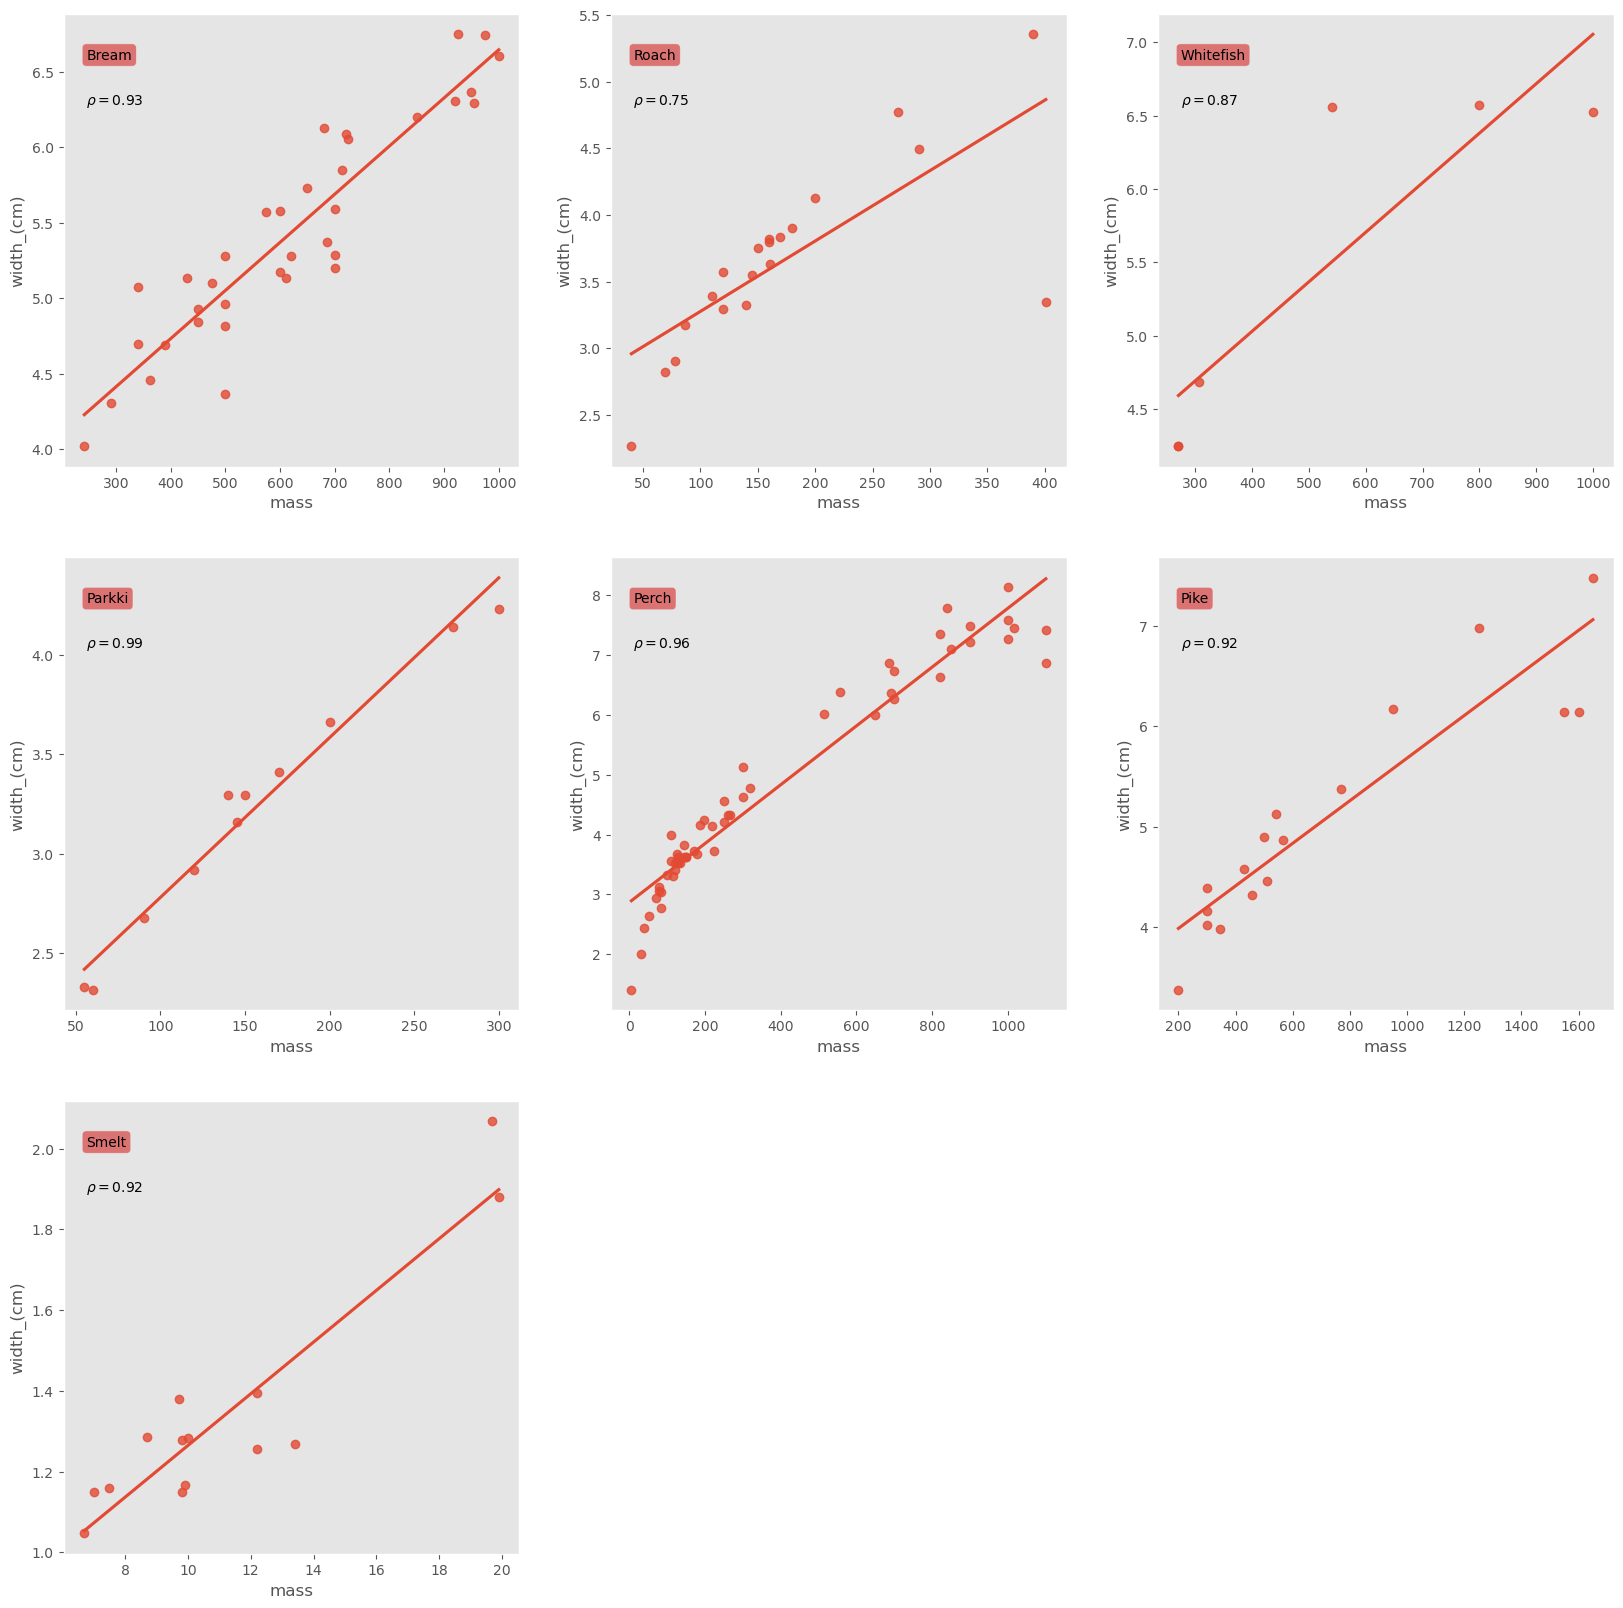

In [79]:
graph.regression_subplots(fish_df, 'species', 'mass', 'width_(cm)', 'ggplot', 3,3)

<div class="alert alert-block alert-info">
<b>Analysis:</b> We observe a high correlation between mass and width measurements in all but two species of fish. For every species of fish other than Roach and Whitefish the Pearson Correrlation Coefficient (Ρ) was over 0.9, which suggests a positive high correlation. Though the correlation for Roach and Whitefish was under 0.9, there was still a moderate positive correlation with the Pearson Correrlation Coefficient (Ρ) being over 0.7.
</div>

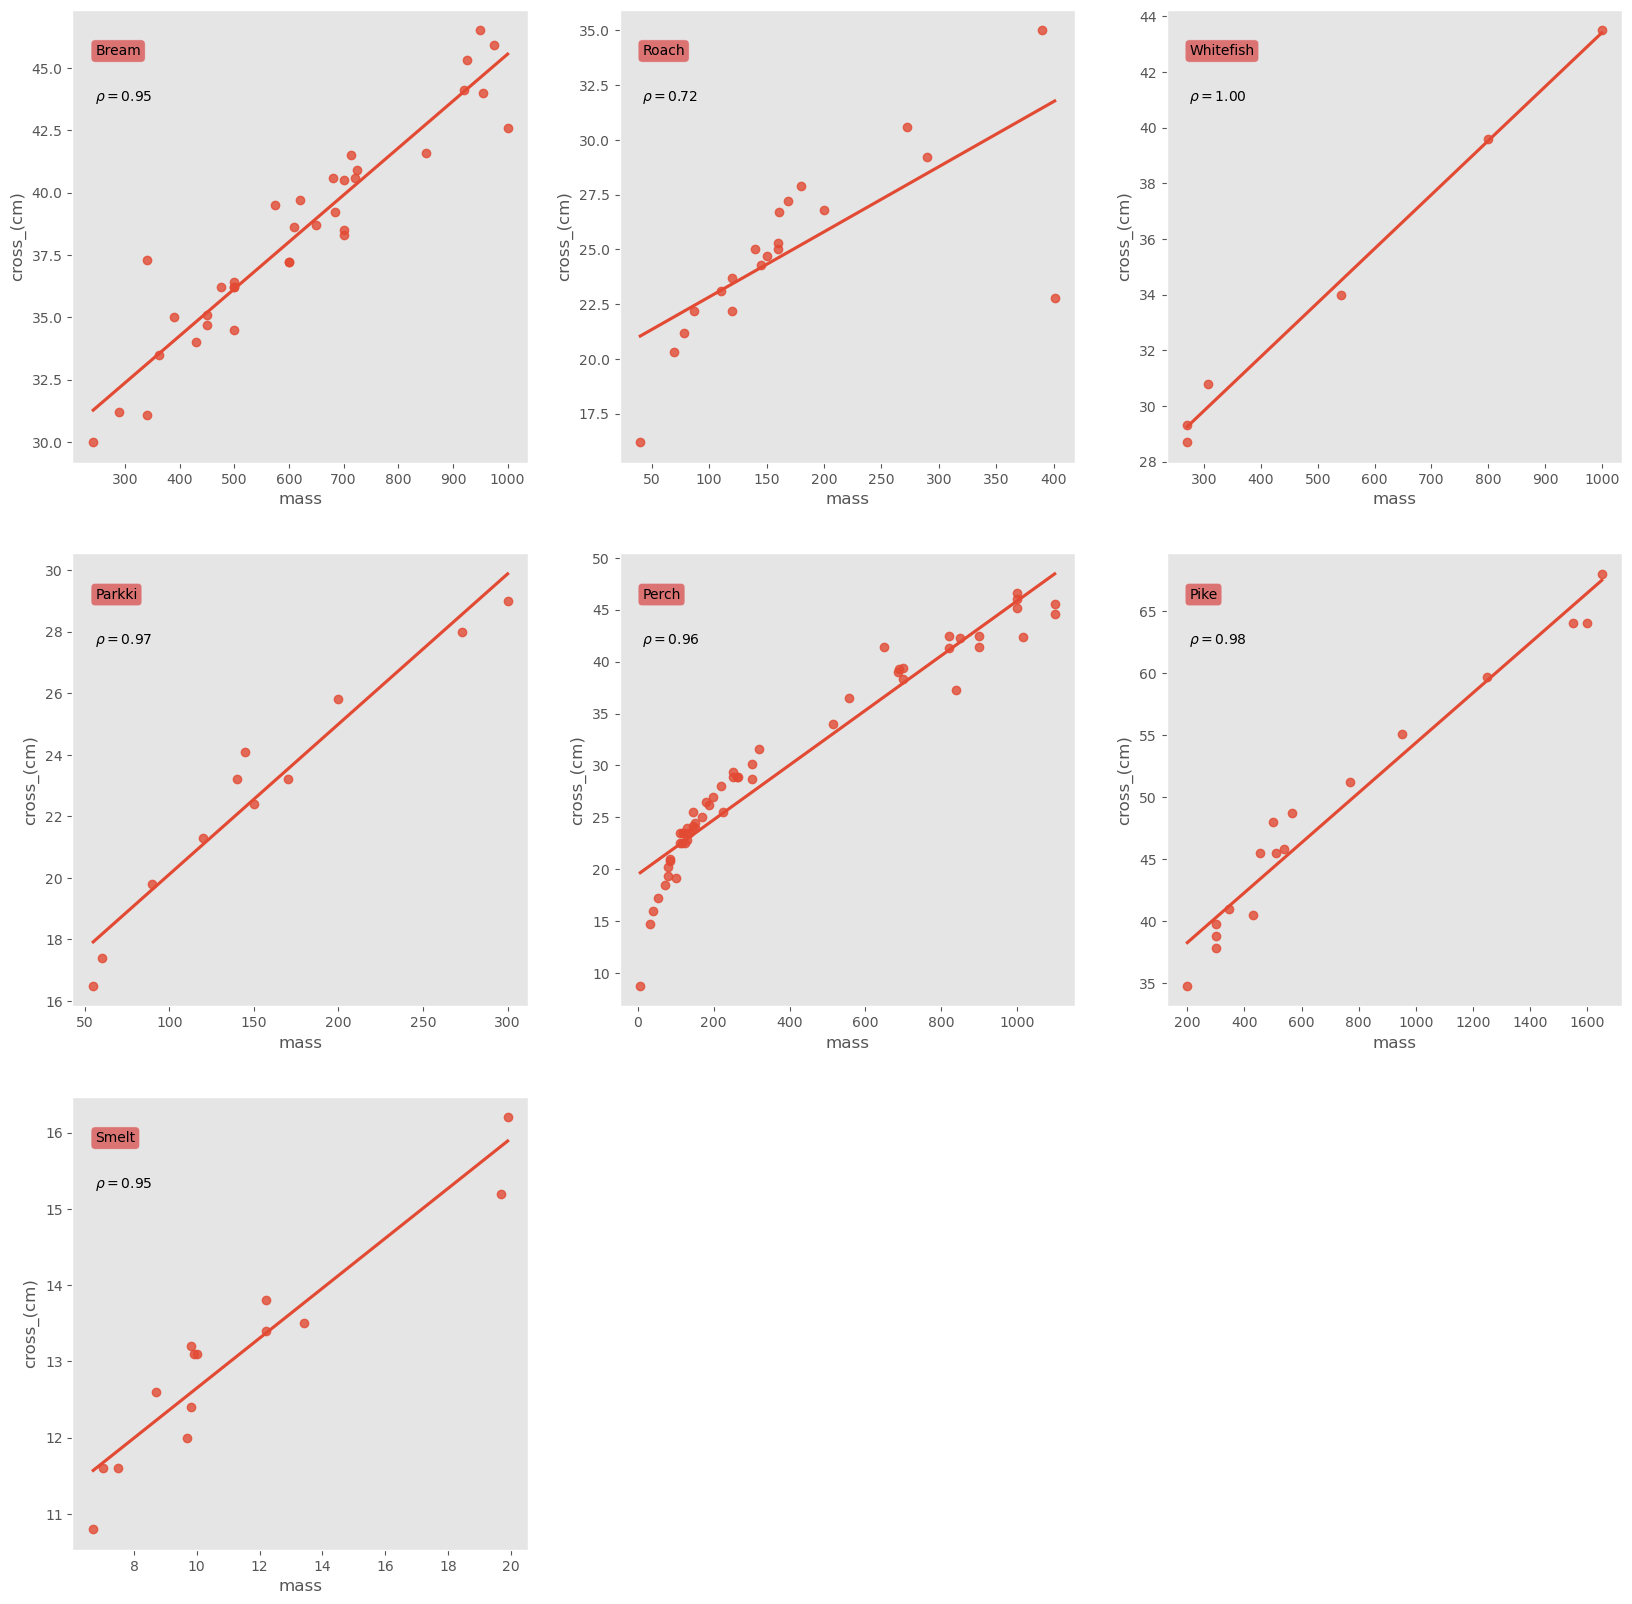

In [80]:
graph.regression_subplots(fish_df, 'species', 'mass', 'cross_(cm)', 'ggplot', 3,3)

<div class="alert alert-block alert-info">
<b>Analysis:</b> We observe a high correlation between mass and cross measurements in all but one one species of fish. For every species of fish other than Roach the Pearson Correrlation Coefficient (Ρ) was over 0.9, which suggests a positive high correlation. Though the correlation for Roach was under 0.9, there was still a moderate positive correlation with the Pearson Correrlation Coefficient (Ρ) being over 0.7.
</div>

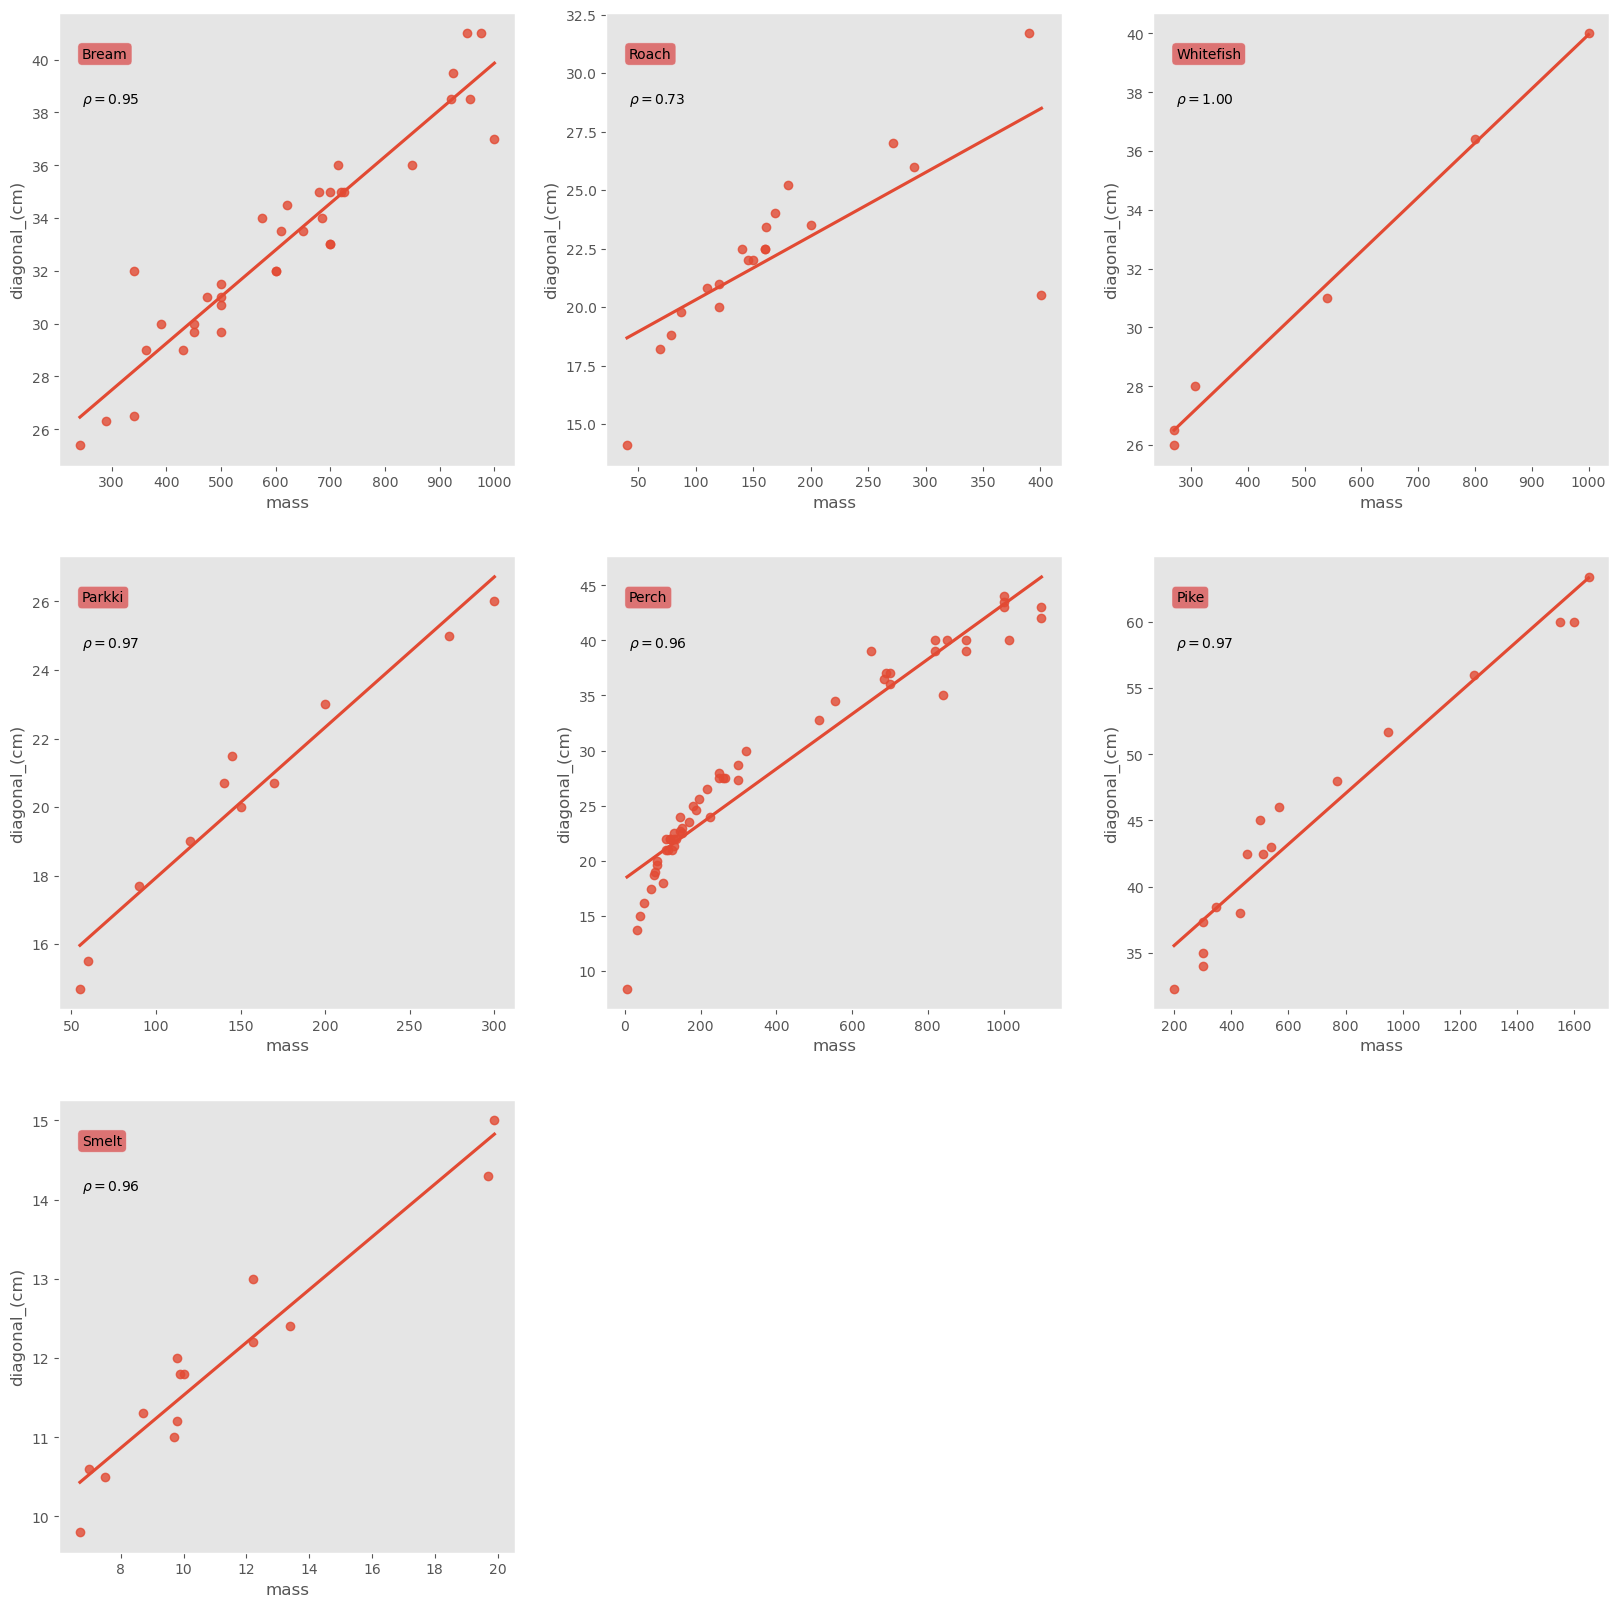

In [81]:
graph.regression_subplots(fish_df, 'species', 'mass', 'diagonal_(cm)', 'ggplot', 3,3)

<div class="alert alert-block alert-info">
<b>Analysis:</b> We observe a high correlation between mass and diagnonal length measurements in all but one one species of fish. For every species of fish other than Roach the Pearson Correrlation Coefficient (Ρ) was over 0.9, which suggests a positive high correlation. Though the correlation for Roach was under 0.9, there was still a moderate positive correlation with the Pearson Correrlation Coefficient (Ρ) being over 0.7.
</div>

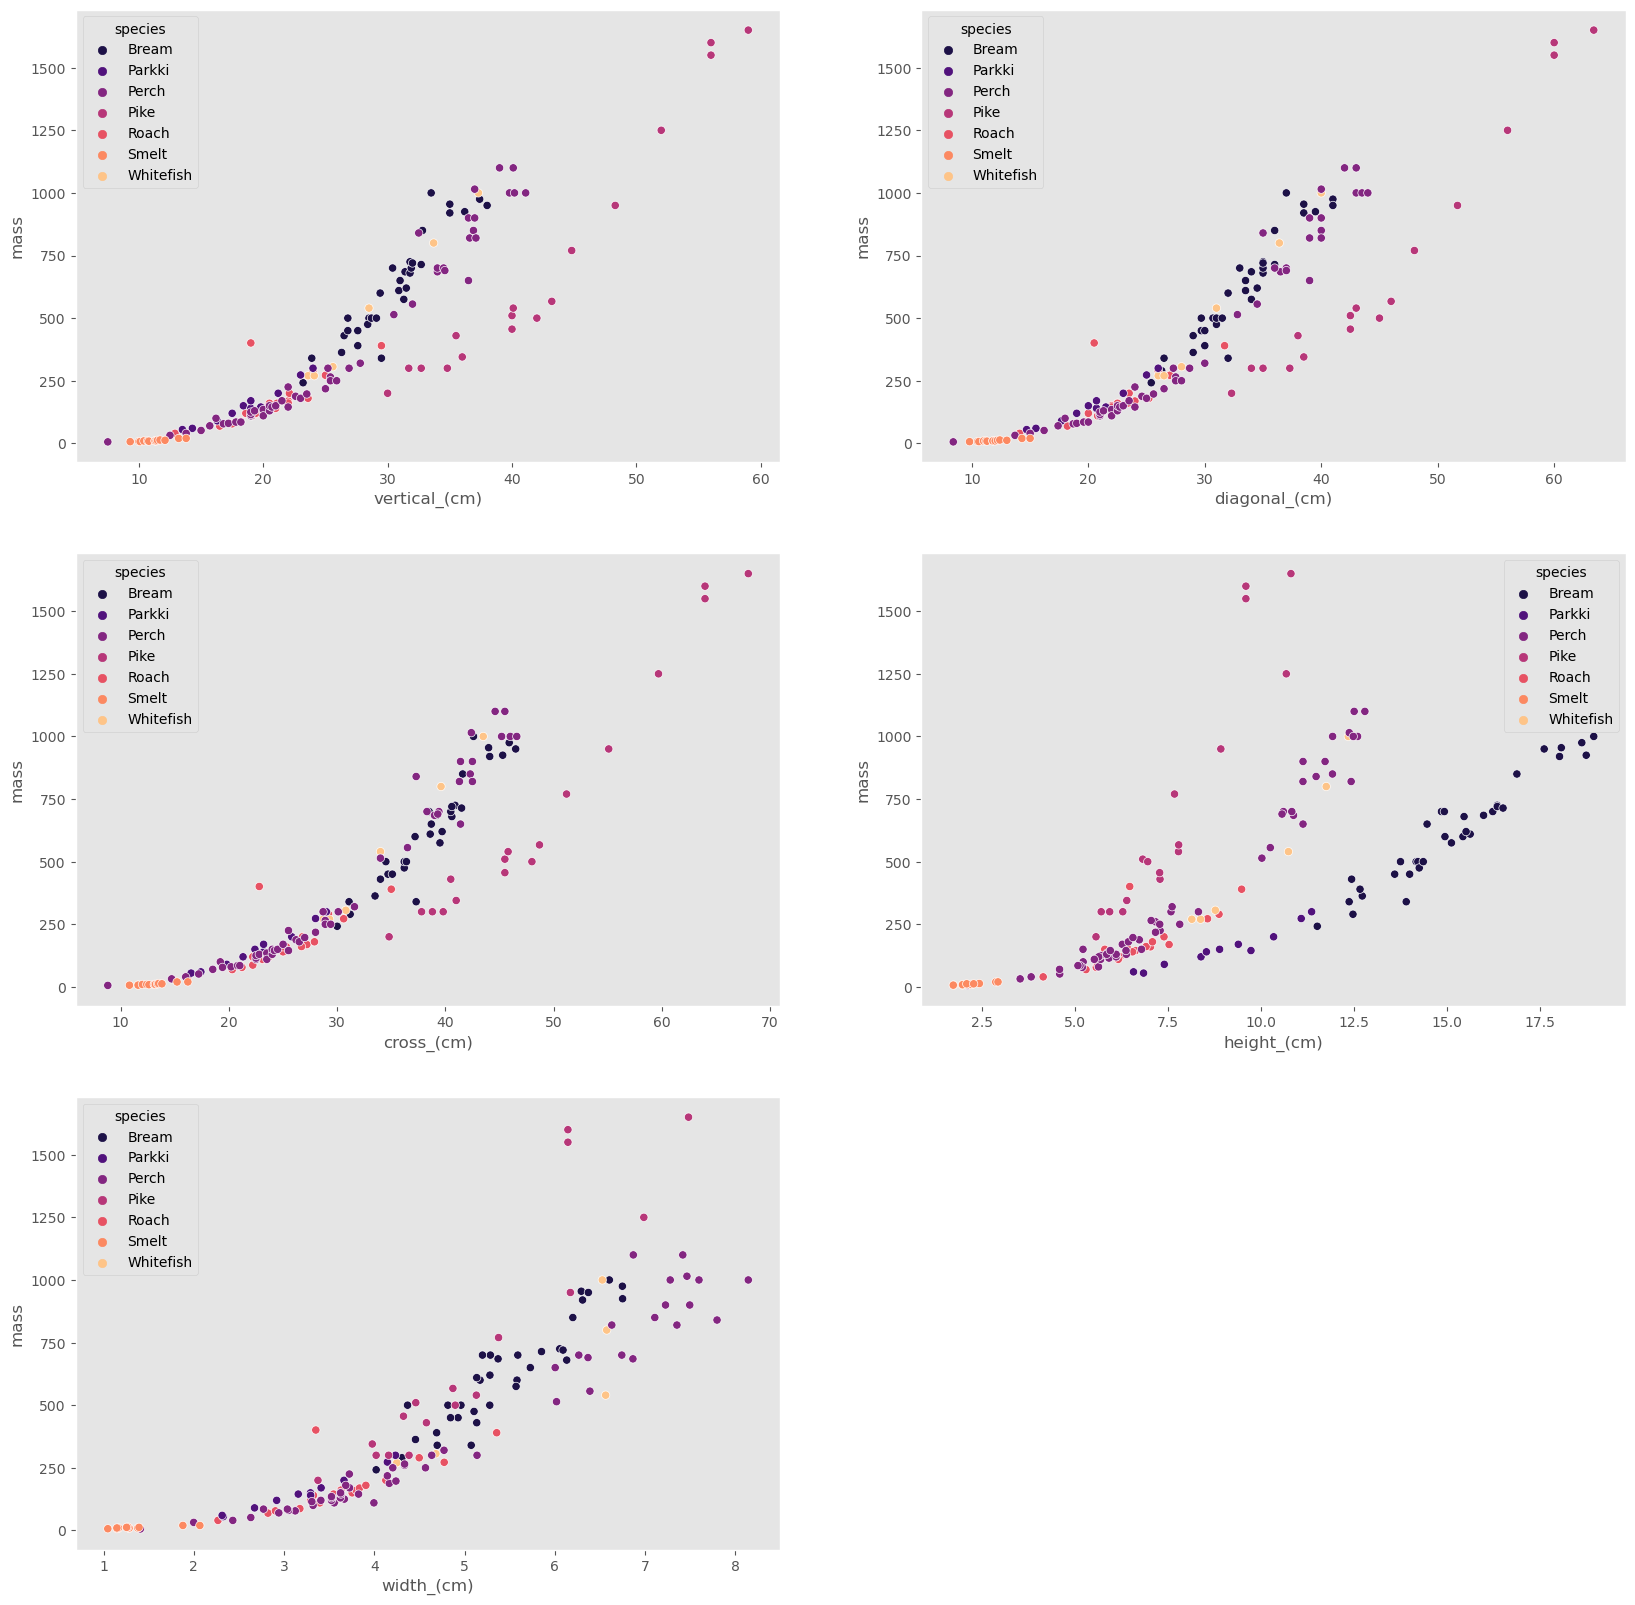

In [82]:
graph.scatter_subplots(fish_df, 'mass', 'species', 'ggplot', 3, 2)

<div class="alert alert-block alert-info">
<b>Analysis:</b> For any of the measurements that increases, so does the mass of the fish.
</div>

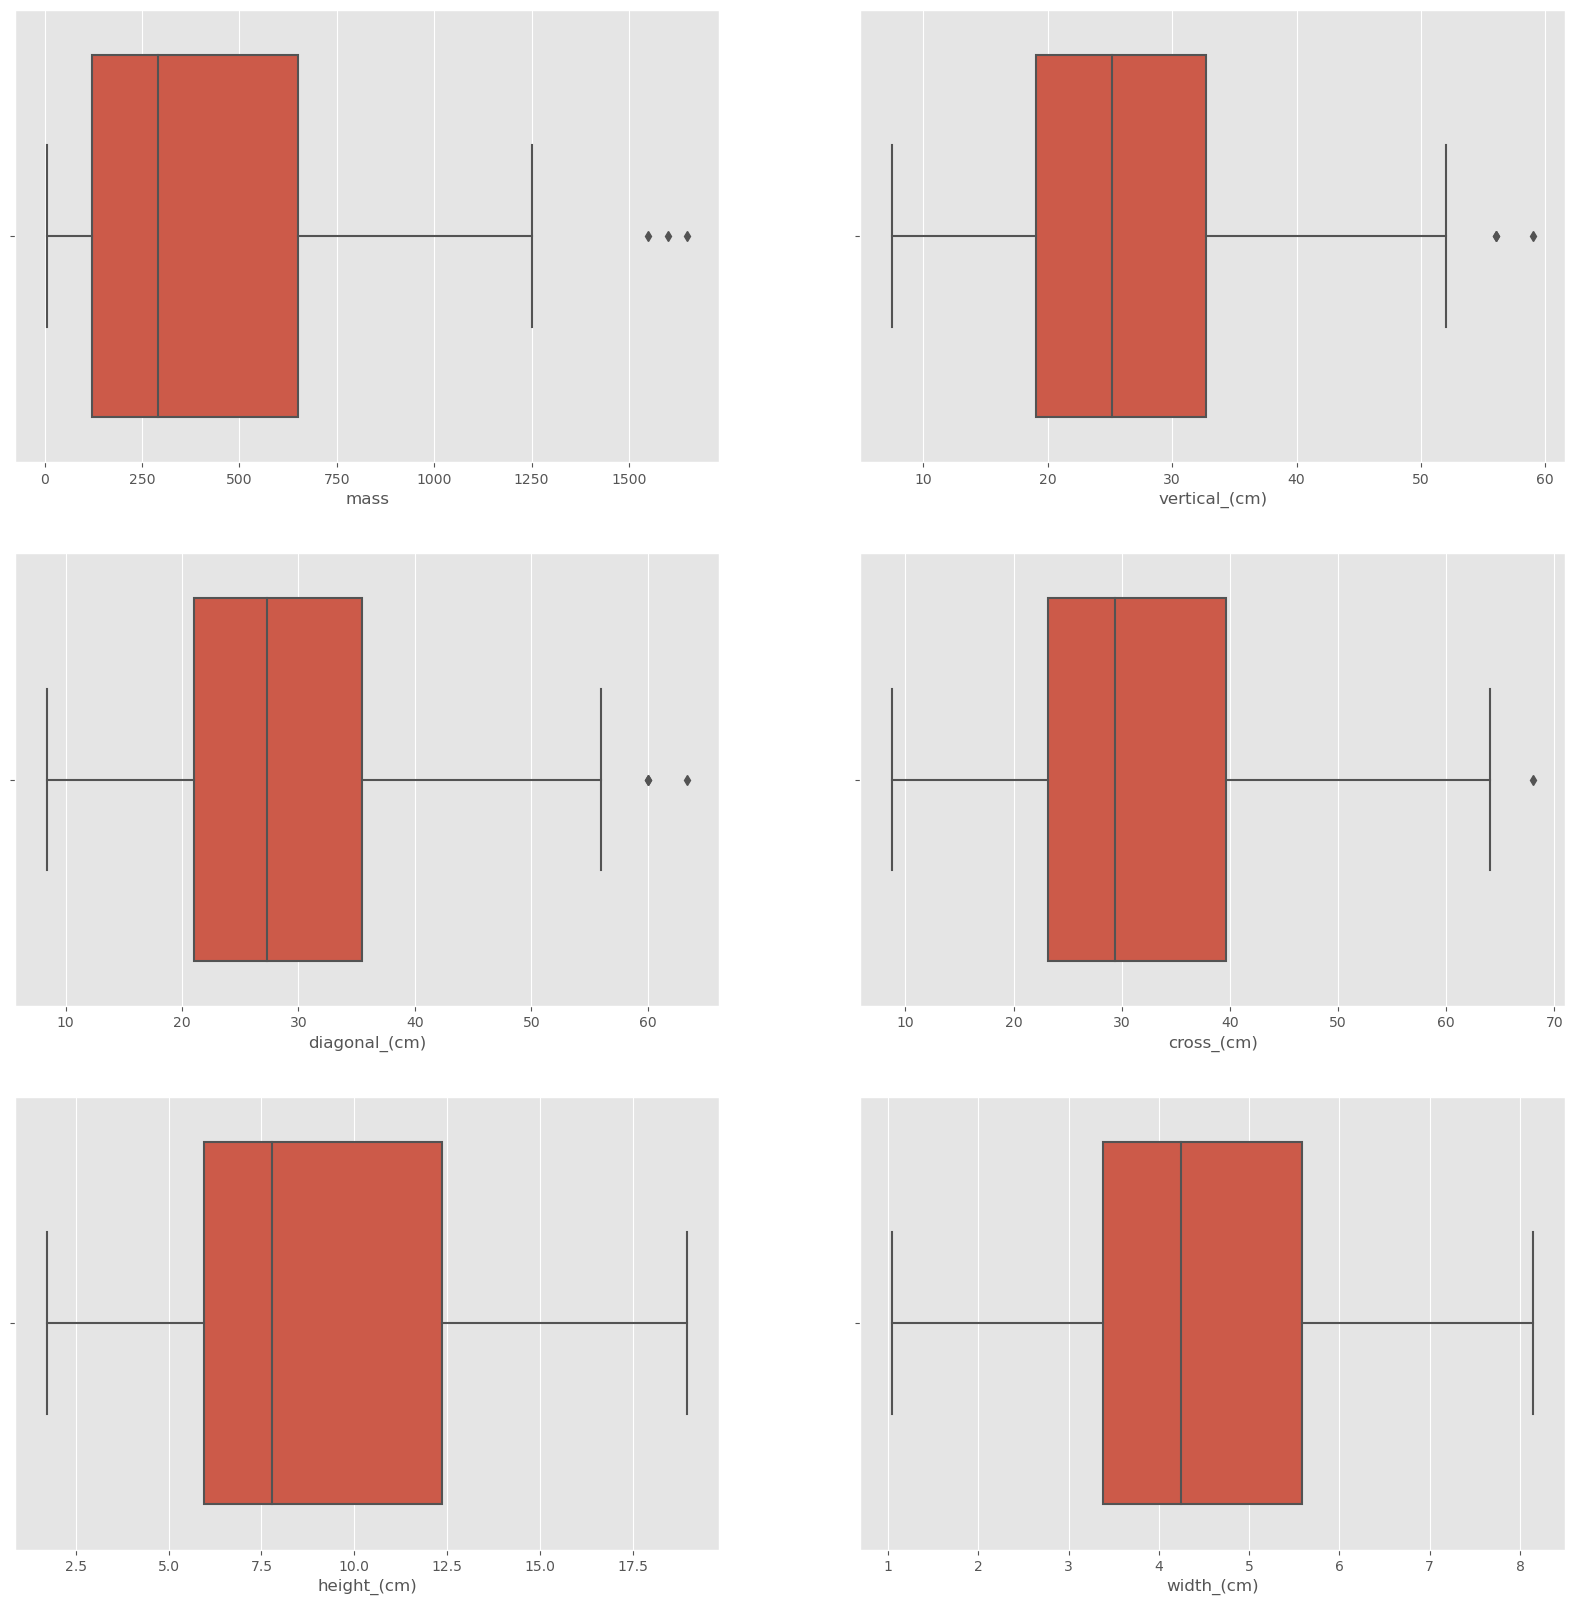

In [83]:
#fish_df.box_subplots('ggplot', 3, 2)
graph.box_subplots(fish_df, 'ggplot', 3, 2)

<div class="alert alert-block alert-info">
<b>Analysis:</b> There are a few ouliers in some of the columns, Let's identify them. We can examine if they are true data points that need to be included in dataset, or errors that need to be removed. 
</div>

In [84]:
# identify outliers by row
fish_df.show_outlier_rows()

---------------------------------------- mass ----------------------------------------
    species    mass  vertical_(cm)  diagonal_(cm)  cross_(cm)  height_(cm)  \
142    Pike  1600.0           56.0           60.0        64.0        9.600   
143    Pike  1550.0           56.0           60.0        64.0        9.600   
144    Pike  1650.0           59.0           63.4        68.0       10.812   

     width_(cm)  
142       6.144  
143       6.144  
144       7.480  
---------------------------------------- vertical_(cm) ----------------------------------------
    species    mass  vertical_(cm)  diagonal_(cm)  cross_(cm)  height_(cm)  \
142    Pike  1600.0           56.0           60.0        64.0        9.600   
143    Pike  1550.0           56.0           60.0        64.0        9.600   
144    Pike  1650.0           59.0           63.4        68.0       10.812   

     width_(cm)  
142       6.144  
143       6.144  
144       7.480  
---------------------------------------- diagon

In [85]:
fish_df.loc[142:144, :]

,species,mass,vertical_(cm),diagonal_(cm),cross_(cm),height_(cm),width_(cm)
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


<div class="alert alert-block alert-info">
<b>Analysis:</b> Since all the outliers involve the Pike species, let's take a look at all the Pike fish recorded and see how the different measurements correspond to each other. 
</div>

In [86]:
fish_df[fish_df['species'] == 'Pike']

,species,mass,vertical_(cm),diagonal_(cm),cross_(cm),height_(cm),width_(cm)
128,Pike,200.0,30.0,32.3,34.8,5.5680,3.3756
129,Pike,300.0,31.7,34.0,37.8,5.7078,4.1580
130,Pike,300.0,32.7,35.0,38.8,5.9364,4.3844
131,Pike,300.0,34.8,37.3,39.8,6.2884,4.0198
132,Pike,430.0,35.5,38.0,40.5,7.2900,4.5765
133,Pike,345.0,36.0,38.5,41.0,6.3960,3.9770
134,Pike,456.0,40.0,42.5,45.5,7.2800,4.3225
135,Pike,510.0,40.0,42.5,45.5,6.8250,4.4590
136,Pike,540.0,40.1,43.0,45.8,7.7860,5.1296
137,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960


<div class="alert alert-block alert-info">
<b>Analysis:</b> As the mass increases so does the corresponding measurements increase. This trend is observed in the outliers also. So, we can conclude that the outliers are valid entries and do not need to be removed. 
</div>

<Axes: >

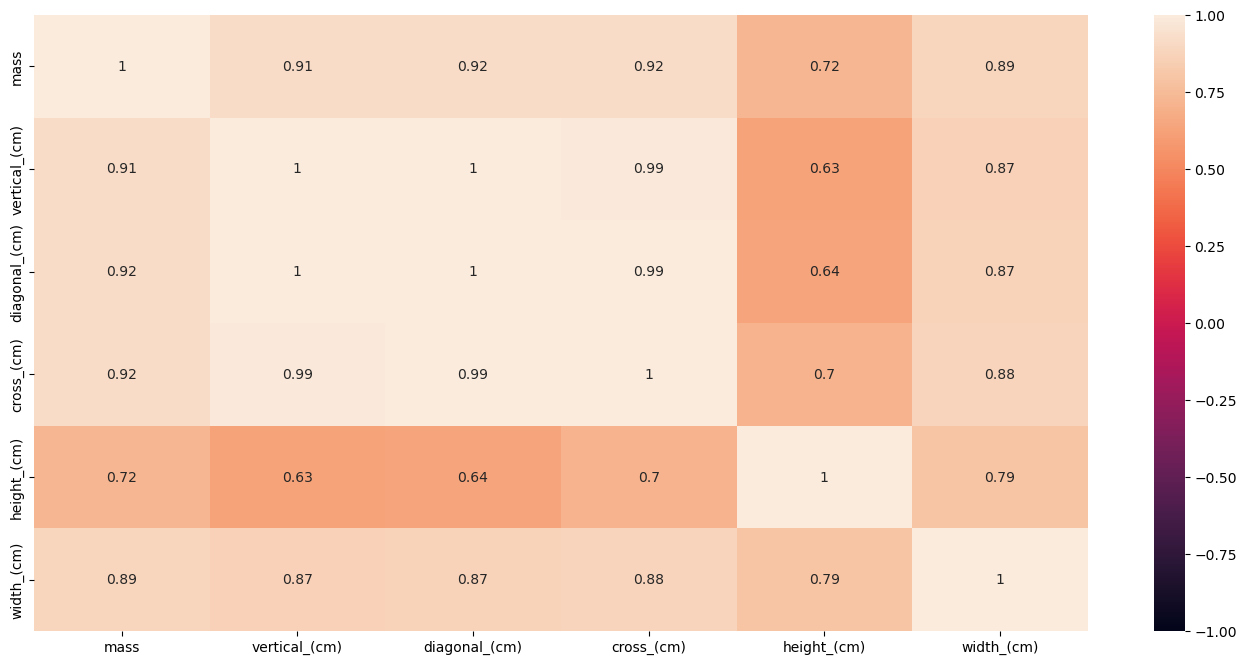

In [87]:
corr = fish_df.corr(numeric_only = True)
plt.figure(figsize=(17,8))
sns.heatmap(data=corr, vmin=-1, annot=True)

<div class="alert alert-block alert-info">
<b>Analysis:</b> Multivariable graph of correlations between attributes. 
</div>

<br><h1><center><em>Prepare Data and Train Data with Regression models</em></center></h1><br>

In [88]:
# Hot encode the species column
reg_df = pd.get_dummies(fish_df, columns=['species'], drop_first=True)

In [89]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# custom transformer to split data
class Fish_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    def transform(self, X):
        X = X
        X = X.drop(['mass'], axis = 1)
        return X 
    def fit(self, X, y):
        return self

In [90]:
# import regression models and metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [91]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(reg_df, reg_df.mass, test_size=0.20, random_state=42)

In [92]:
# initialize models to a list
regs = [LinearRegression(),
        GradientBoostingRegressor(max_depth=2, n_estimators=50, learning_rate=0.1, random_state=42),
        RandomForestRegressor(min_samples_split=4, max_depth=4, n_estimators=100, random_state=42),
        DecisionTreeRegressor(splitter='best', max_depth=4, min_samples_split=4, random_state=42)]

In [93]:
# create a function to train all regression models and plot the actual vs predicted values for a certian measurement
def models(column):
    fig = plt.figure(figsize=(20,20))
    k = 1
    # iterate over regressors and fit models
    for x in regs:
        pipe = Pipeline([
            ('transformer', Fish_Transformer()),
            ('scaler', MinMaxScaler(),),
            ('reg', x)
        ])
        pipe.fit(X_train, y_train.ravel()) # train model
        regressor = pipe['reg'].__class__.__name__ # name regressor used
        print('-'*20, regressor, '-'*20, end='\n\n')
        score = pipe.score(X_train, y_train.ravel()) # accuracy score model
        y_pred = pipe.predict(X_test) # prediction
        rs = r2_score(y_test.ravel(), y_pred) # R-Squared value
        adj_rs = 1 - ((1-rs)*(X_train.shape[0] - 1) / (X_train.shape[0]-X_train.shape[1]-1)) # Adjusted R-Square
        rmse = mean_squared_error(y_test, y_pred, squared=False) # Root Mean Square Error
        print(f"The R-Squared value for {regressor} is: {round(rs, 4)}")
        print(f"The Adj R-Squared value for {regressor} is: {round(adj_rs, 4)}")
        print(f"The RMSE value for {regressor} is: {round(rmse, 4)}")
        print(f"The score for {regressor} is: {round(score*100, 2)}%", end='\n\n')
        # plot the actual vs predicted values for a certian measurement
        with plt.style.context('ggplot'):
            plt.subplot(2,2,k)
            plt.scatter(X_test[column], y_test, color='crimson', alpha=0.4)
            plt.scatter(X_test[column], y_pred, color='navy', alpha=0.4)
            plt.xlabel(f'{column.title().replace("_(Cm)", "")} Measurement in (cm)')
            plt.ylabel('Mass of the fish')
            plt.title(f'{regressor} Model for Weight Estimation')
            plt.grid(False)
            k += 1
    plt.show()

-------------------- LinearRegression --------------------

The R-Squared value for LinearRegression is: 0.9512
The Adj R-Squared value for LinearRegression is: 0.946
The RMSE value for LinearRegression is: 83.347
The score for LinearRegression is: 92.18%

-------------------- GradientBoostingRegressor --------------------

The R-Squared value for GradientBoostingRegressor is: 0.9774
The Adj R-Squared value for GradientBoostingRegressor is: 0.975
The RMSE value for GradientBoostingRegressor is: 56.6654
The score for GradientBoostingRegressor is: 99.14%

-------------------- RandomForestRegressor --------------------

The R-Squared value for RandomForestRegressor is: 0.9642
The Adj R-Squared value for RandomForestRegressor is: 0.9604
The RMSE value for RandomForestRegressor is: 71.3972
The score for RandomForestRegressor is: 98.71%

-------------------- DecisionTreeRegressor --------------------

The R-Squared value for DecisionTreeRegressor is: 0.9456
The Adj R-Squared value for Decisi

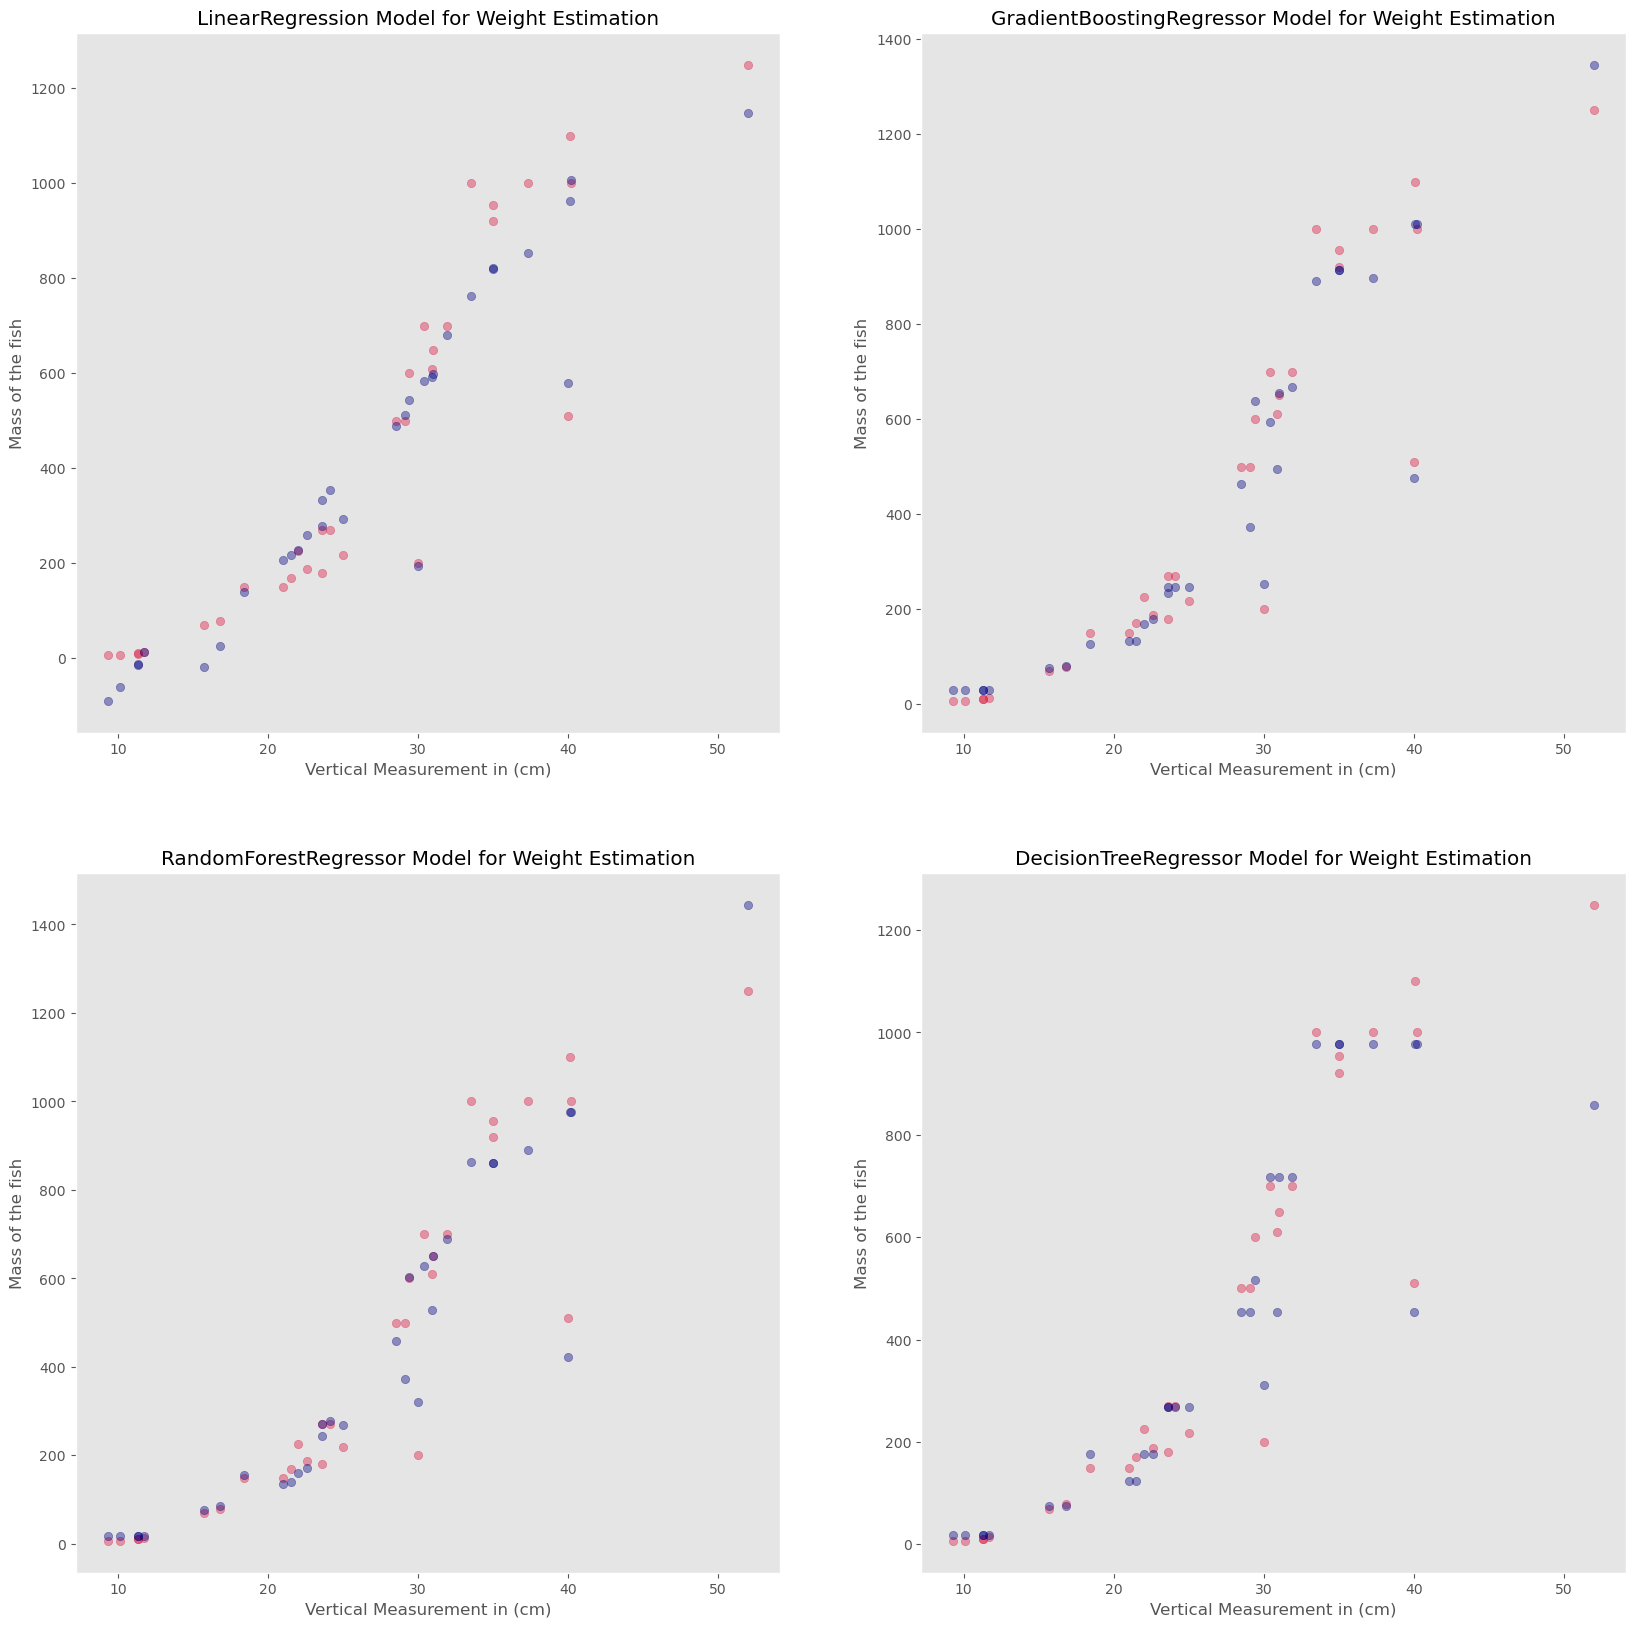

In [94]:
models('vertical_(cm)')

-------------------- LinearRegression --------------------

The R-Squared value for LinearRegression is: 0.9512
The Adj R-Squared value for LinearRegression is: 0.946
The RMSE value for LinearRegression is: 83.347
The score for LinearRegression is: 92.18%

-------------------- GradientBoostingRegressor --------------------

The R-Squared value for GradientBoostingRegressor is: 0.9774
The Adj R-Squared value for GradientBoostingRegressor is: 0.975
The RMSE value for GradientBoostingRegressor is: 56.6654
The score for GradientBoostingRegressor is: 99.14%

-------------------- RandomForestRegressor --------------------

The R-Squared value for RandomForestRegressor is: 0.9642
The Adj R-Squared value for RandomForestRegressor is: 0.9604
The RMSE value for RandomForestRegressor is: 71.3972
The score for RandomForestRegressor is: 98.71%

-------------------- DecisionTreeRegressor --------------------

The R-Squared value for DecisionTreeRegressor is: 0.9456
The Adj R-Squared value for Decisi

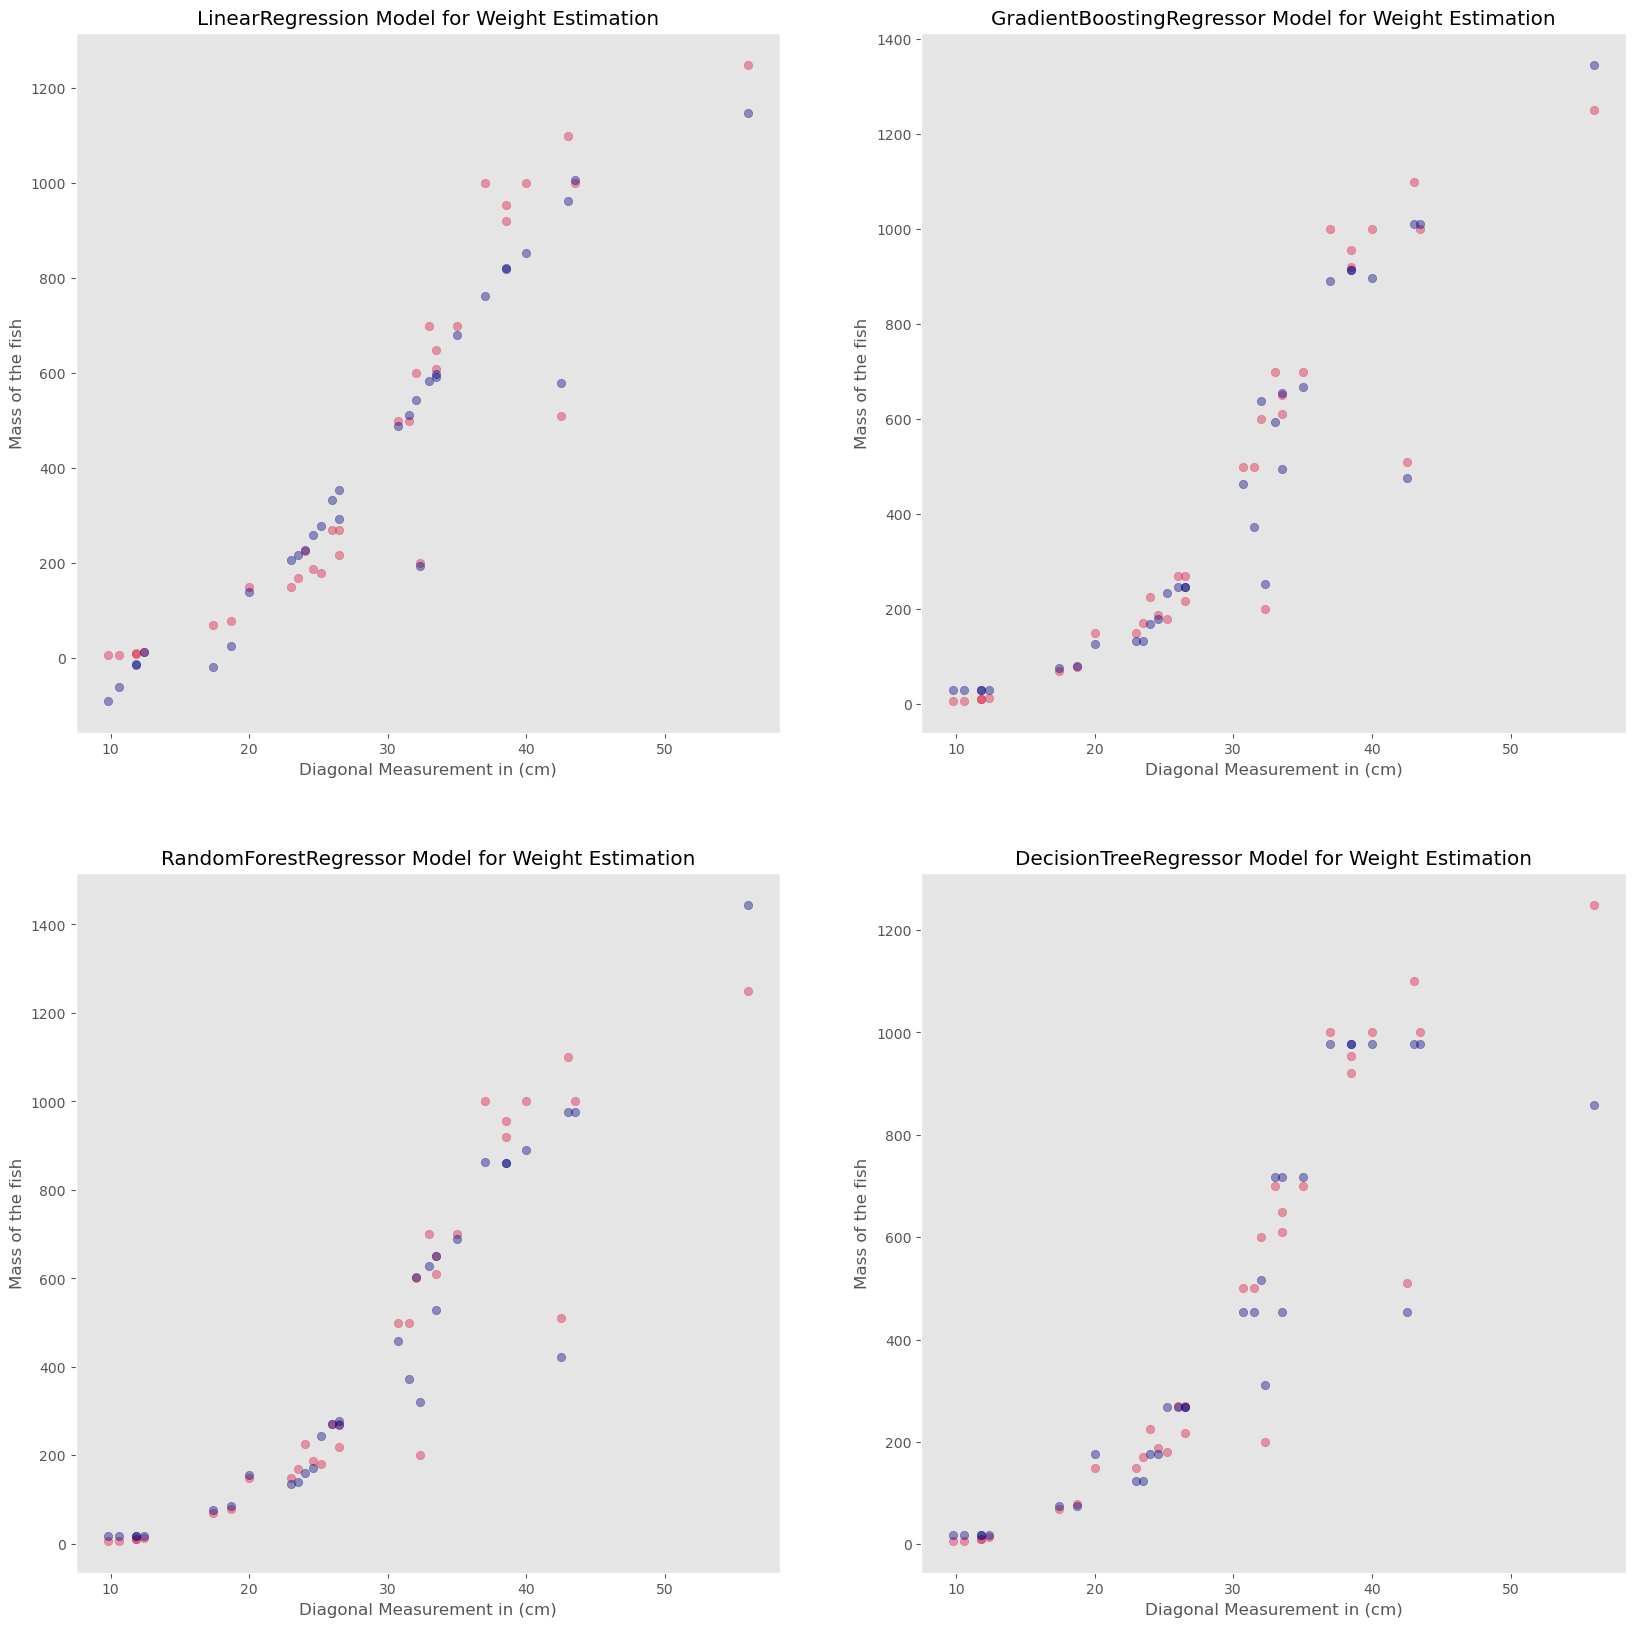

In [95]:
models('diagonal_(cm)')

-------------------- LinearRegression --------------------

The R-Squared value for LinearRegression is: 0.9512
The Adj R-Squared value for LinearRegression is: 0.946
The RMSE value for LinearRegression is: 83.347
The score for LinearRegression is: 92.18%

-------------------- GradientBoostingRegressor --------------------

The R-Squared value for GradientBoostingRegressor is: 0.9774
The Adj R-Squared value for GradientBoostingRegressor is: 0.975
The RMSE value for GradientBoostingRegressor is: 56.6654
The score for GradientBoostingRegressor is: 99.14%

-------------------- RandomForestRegressor --------------------

The R-Squared value for RandomForestRegressor is: 0.9642
The Adj R-Squared value for RandomForestRegressor is: 0.9604
The RMSE value for RandomForestRegressor is: 71.3972
The score for RandomForestRegressor is: 98.71%

-------------------- DecisionTreeRegressor --------------------

The R-Squared value for DecisionTreeRegressor is: 0.9456
The Adj R-Squared value for Decisi

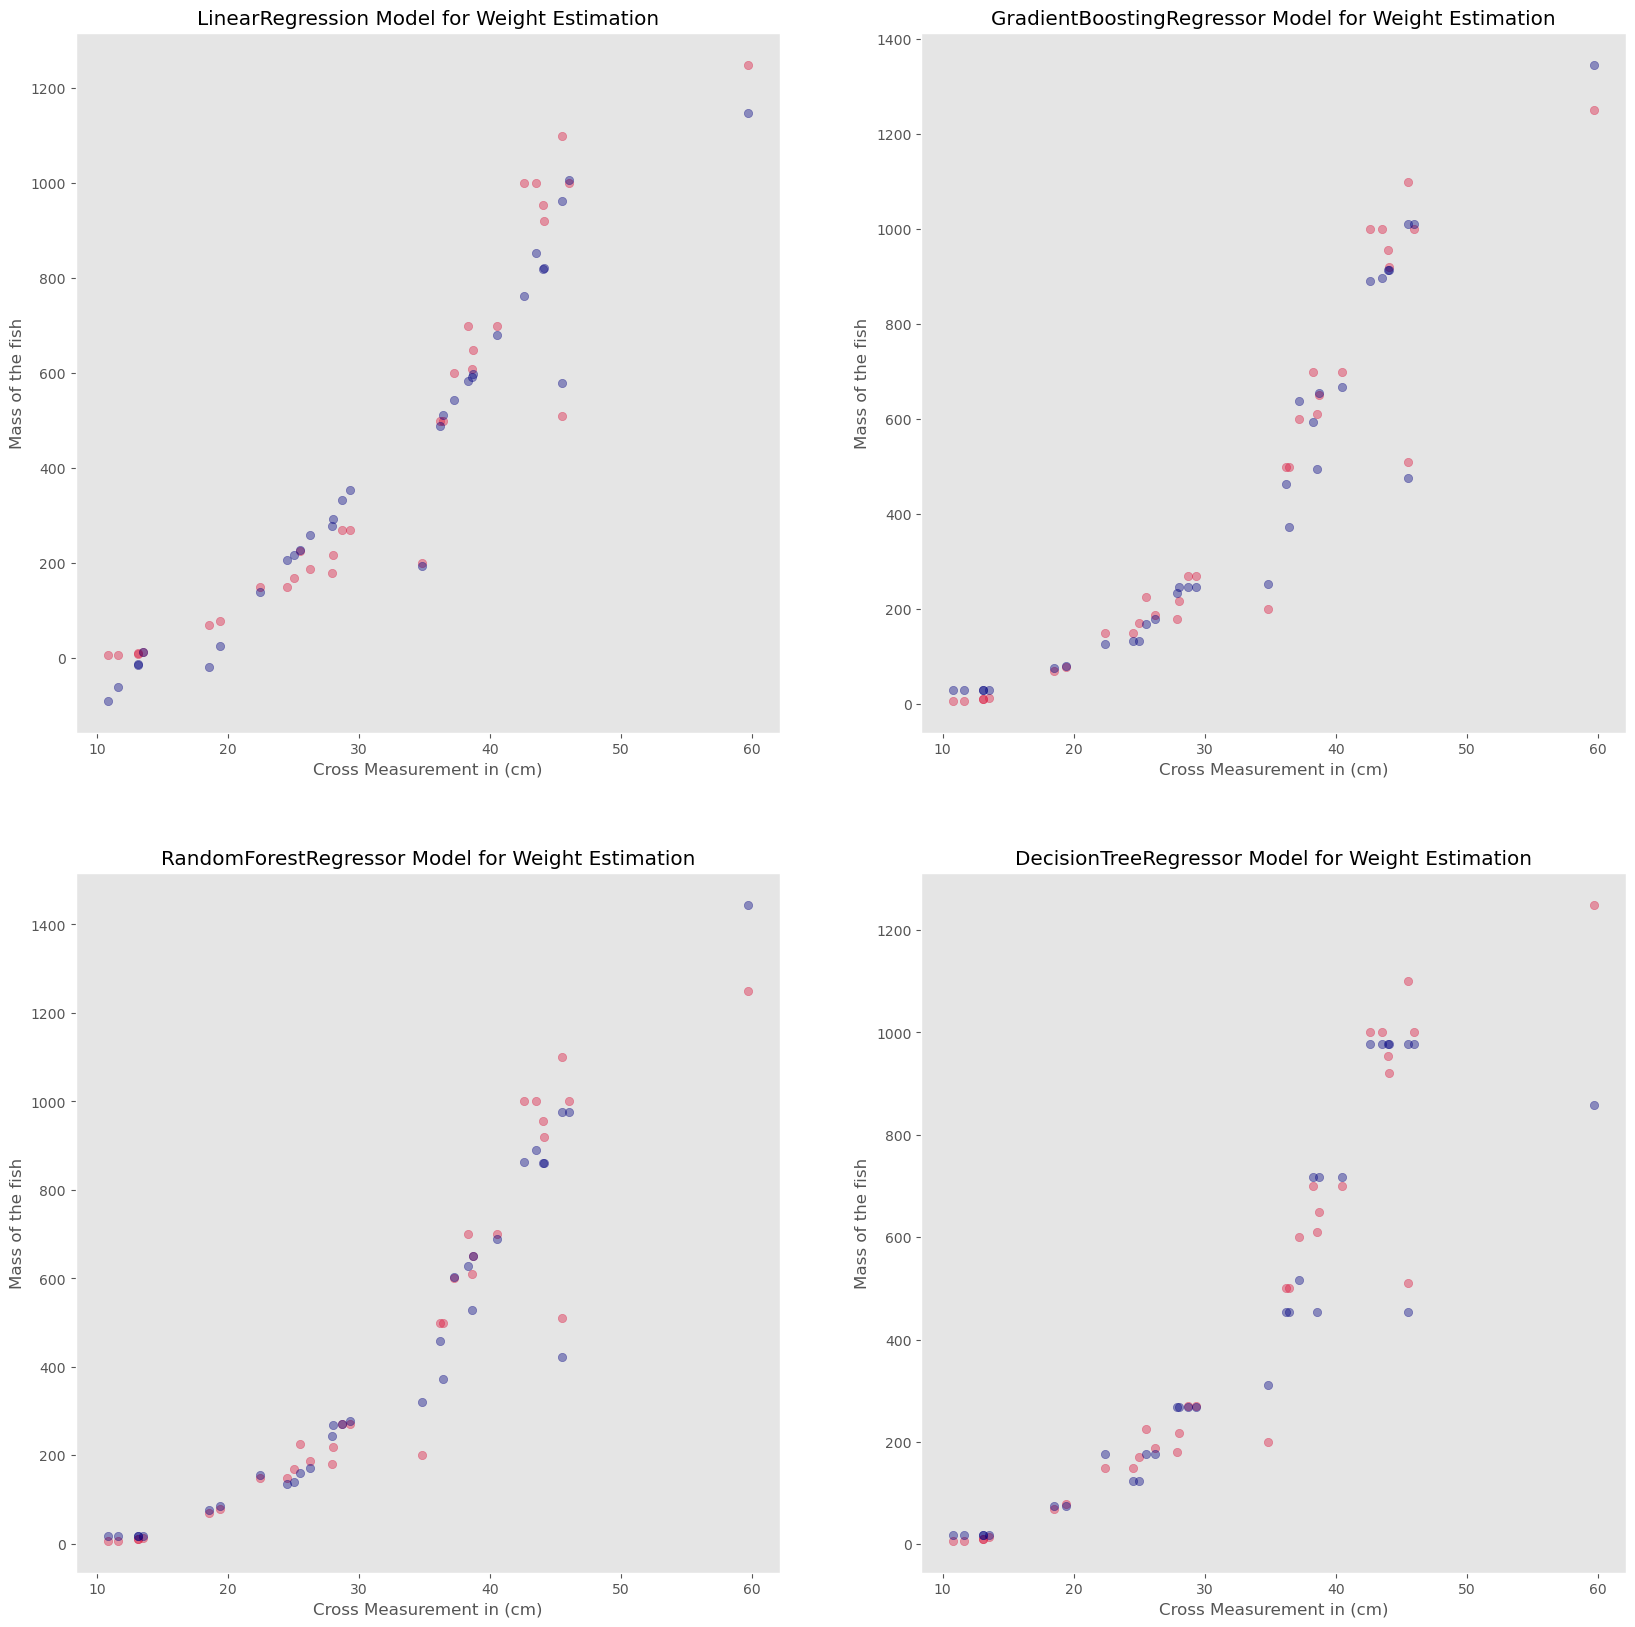

In [96]:
models('cross_(cm)')

-------------------- LinearRegression --------------------

The R-Squared value for LinearRegression is: 0.9512
The Adj R-Squared value for LinearRegression is: 0.946
The RMSE value for LinearRegression is: 83.347
The score for LinearRegression is: 92.18%

-------------------- GradientBoostingRegressor --------------------

The R-Squared value for GradientBoostingRegressor is: 0.9774
The Adj R-Squared value for GradientBoostingRegressor is: 0.975
The RMSE value for GradientBoostingRegressor is: 56.6654
The score for GradientBoostingRegressor is: 99.14%

-------------------- RandomForestRegressor --------------------

The R-Squared value for RandomForestRegressor is: 0.9642
The Adj R-Squared value for RandomForestRegressor is: 0.9604
The RMSE value for RandomForestRegressor is: 71.3972
The score for RandomForestRegressor is: 98.71%

-------------------- DecisionTreeRegressor --------------------

The R-Squared value for DecisionTreeRegressor is: 0.9456
The Adj R-Squared value for Decisi

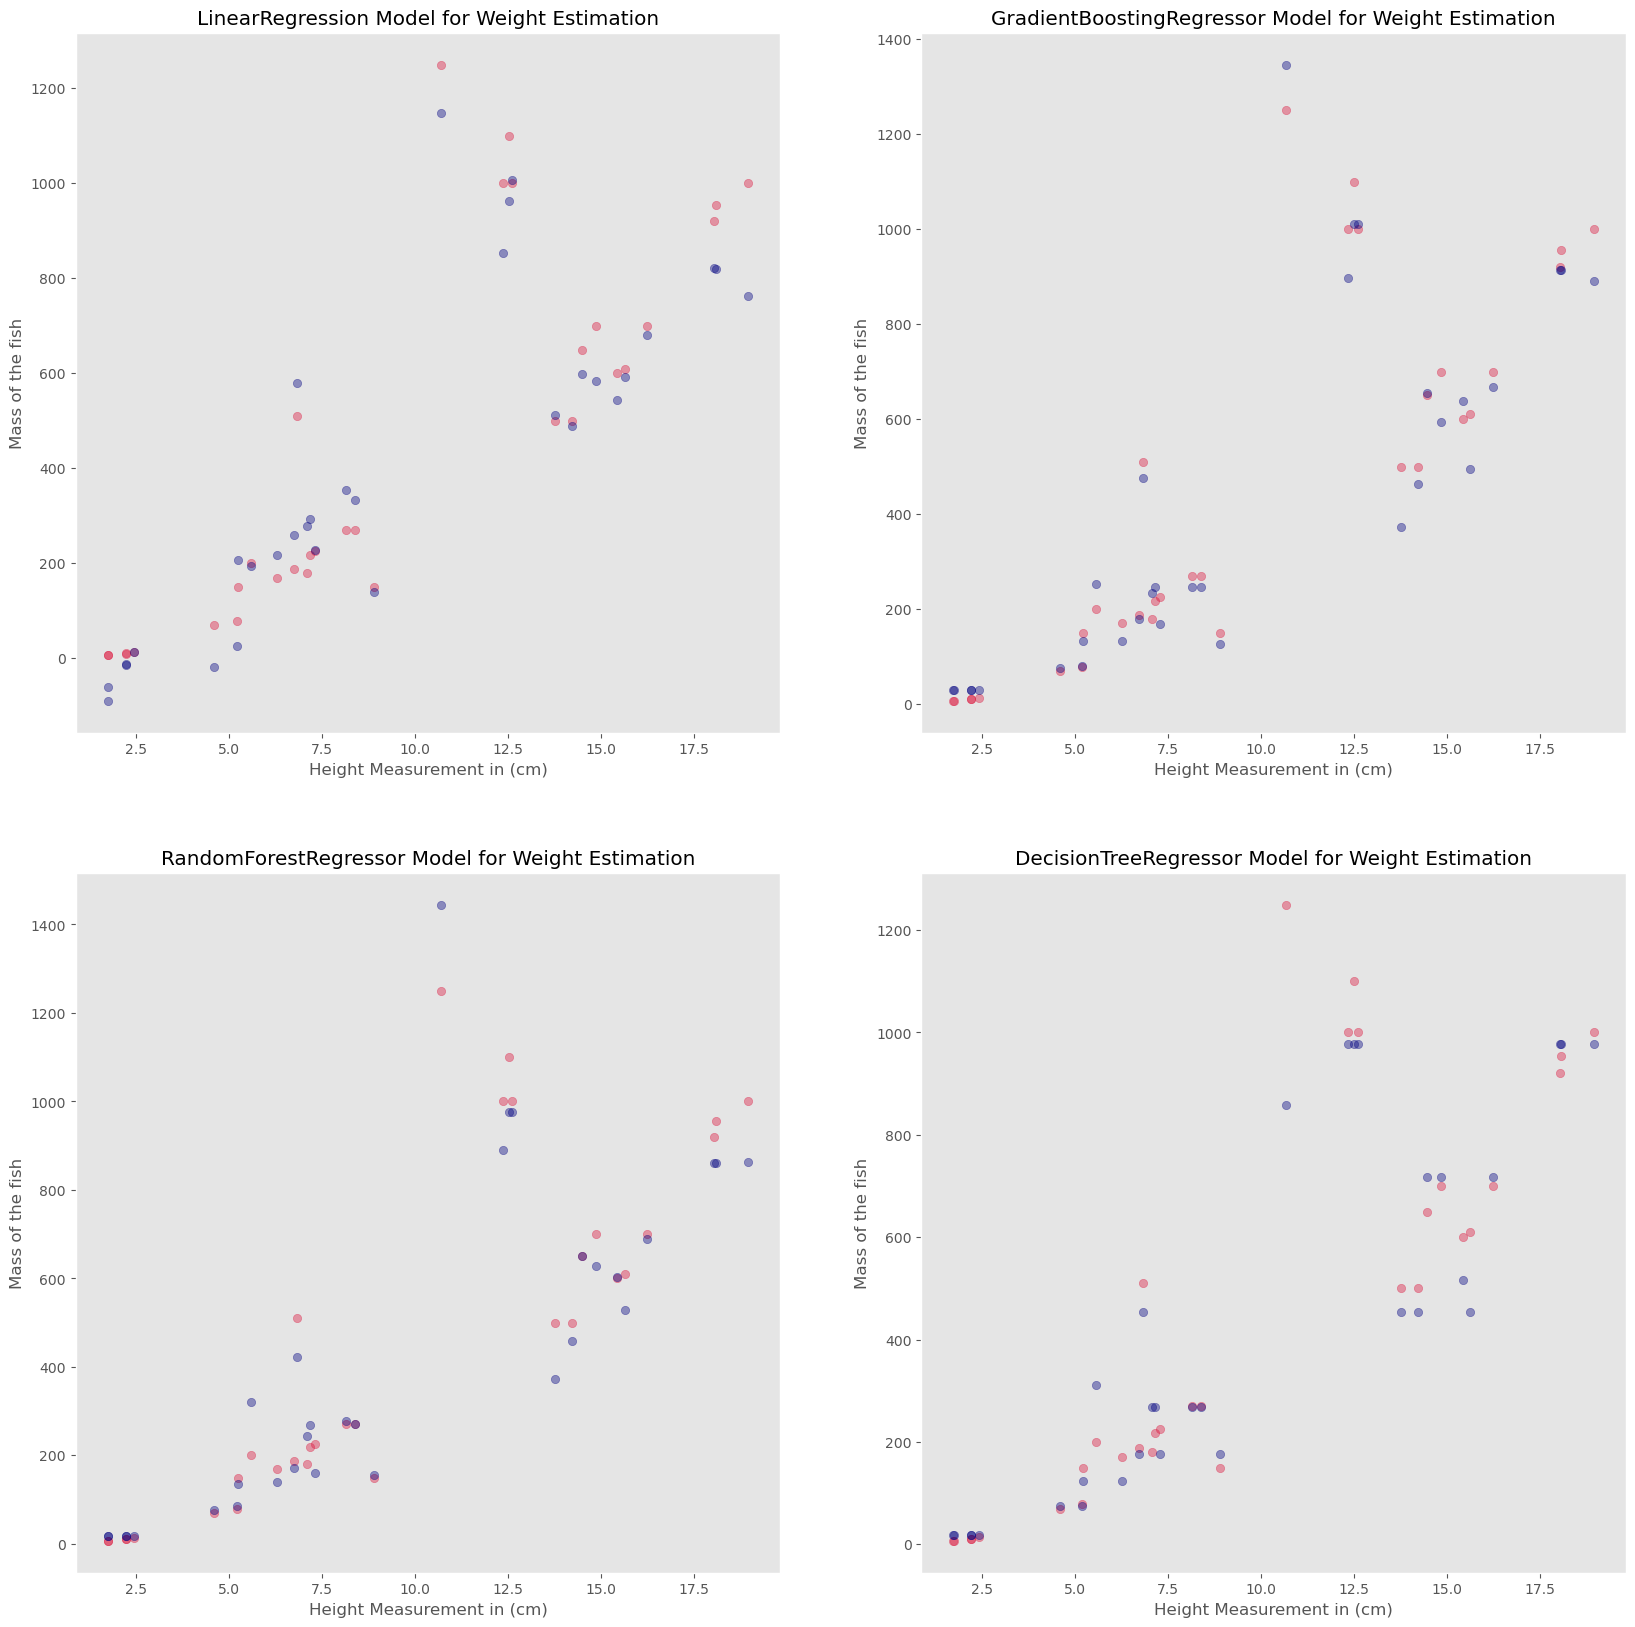

In [97]:
models('height_(cm)')

-------------------- LinearRegression --------------------

The R-Squared value for LinearRegression is: 0.9512
The Adj R-Squared value for LinearRegression is: 0.946
The RMSE value for LinearRegression is: 83.347
The score for LinearRegression is: 92.18%

-------------------- GradientBoostingRegressor --------------------

The R-Squared value for GradientBoostingRegressor is: 0.9774
The Adj R-Squared value for GradientBoostingRegressor is: 0.975
The RMSE value for GradientBoostingRegressor is: 56.6654
The score for GradientBoostingRegressor is: 99.14%

-------------------- RandomForestRegressor --------------------

The R-Squared value for RandomForestRegressor is: 0.9642
The Adj R-Squared value for RandomForestRegressor is: 0.9604
The RMSE value for RandomForestRegressor is: 71.3972
The score for RandomForestRegressor is: 98.71%

-------------------- DecisionTreeRegressor --------------------

The R-Squared value for DecisionTreeRegressor is: 0.9456
The Adj R-Squared value for Decisi

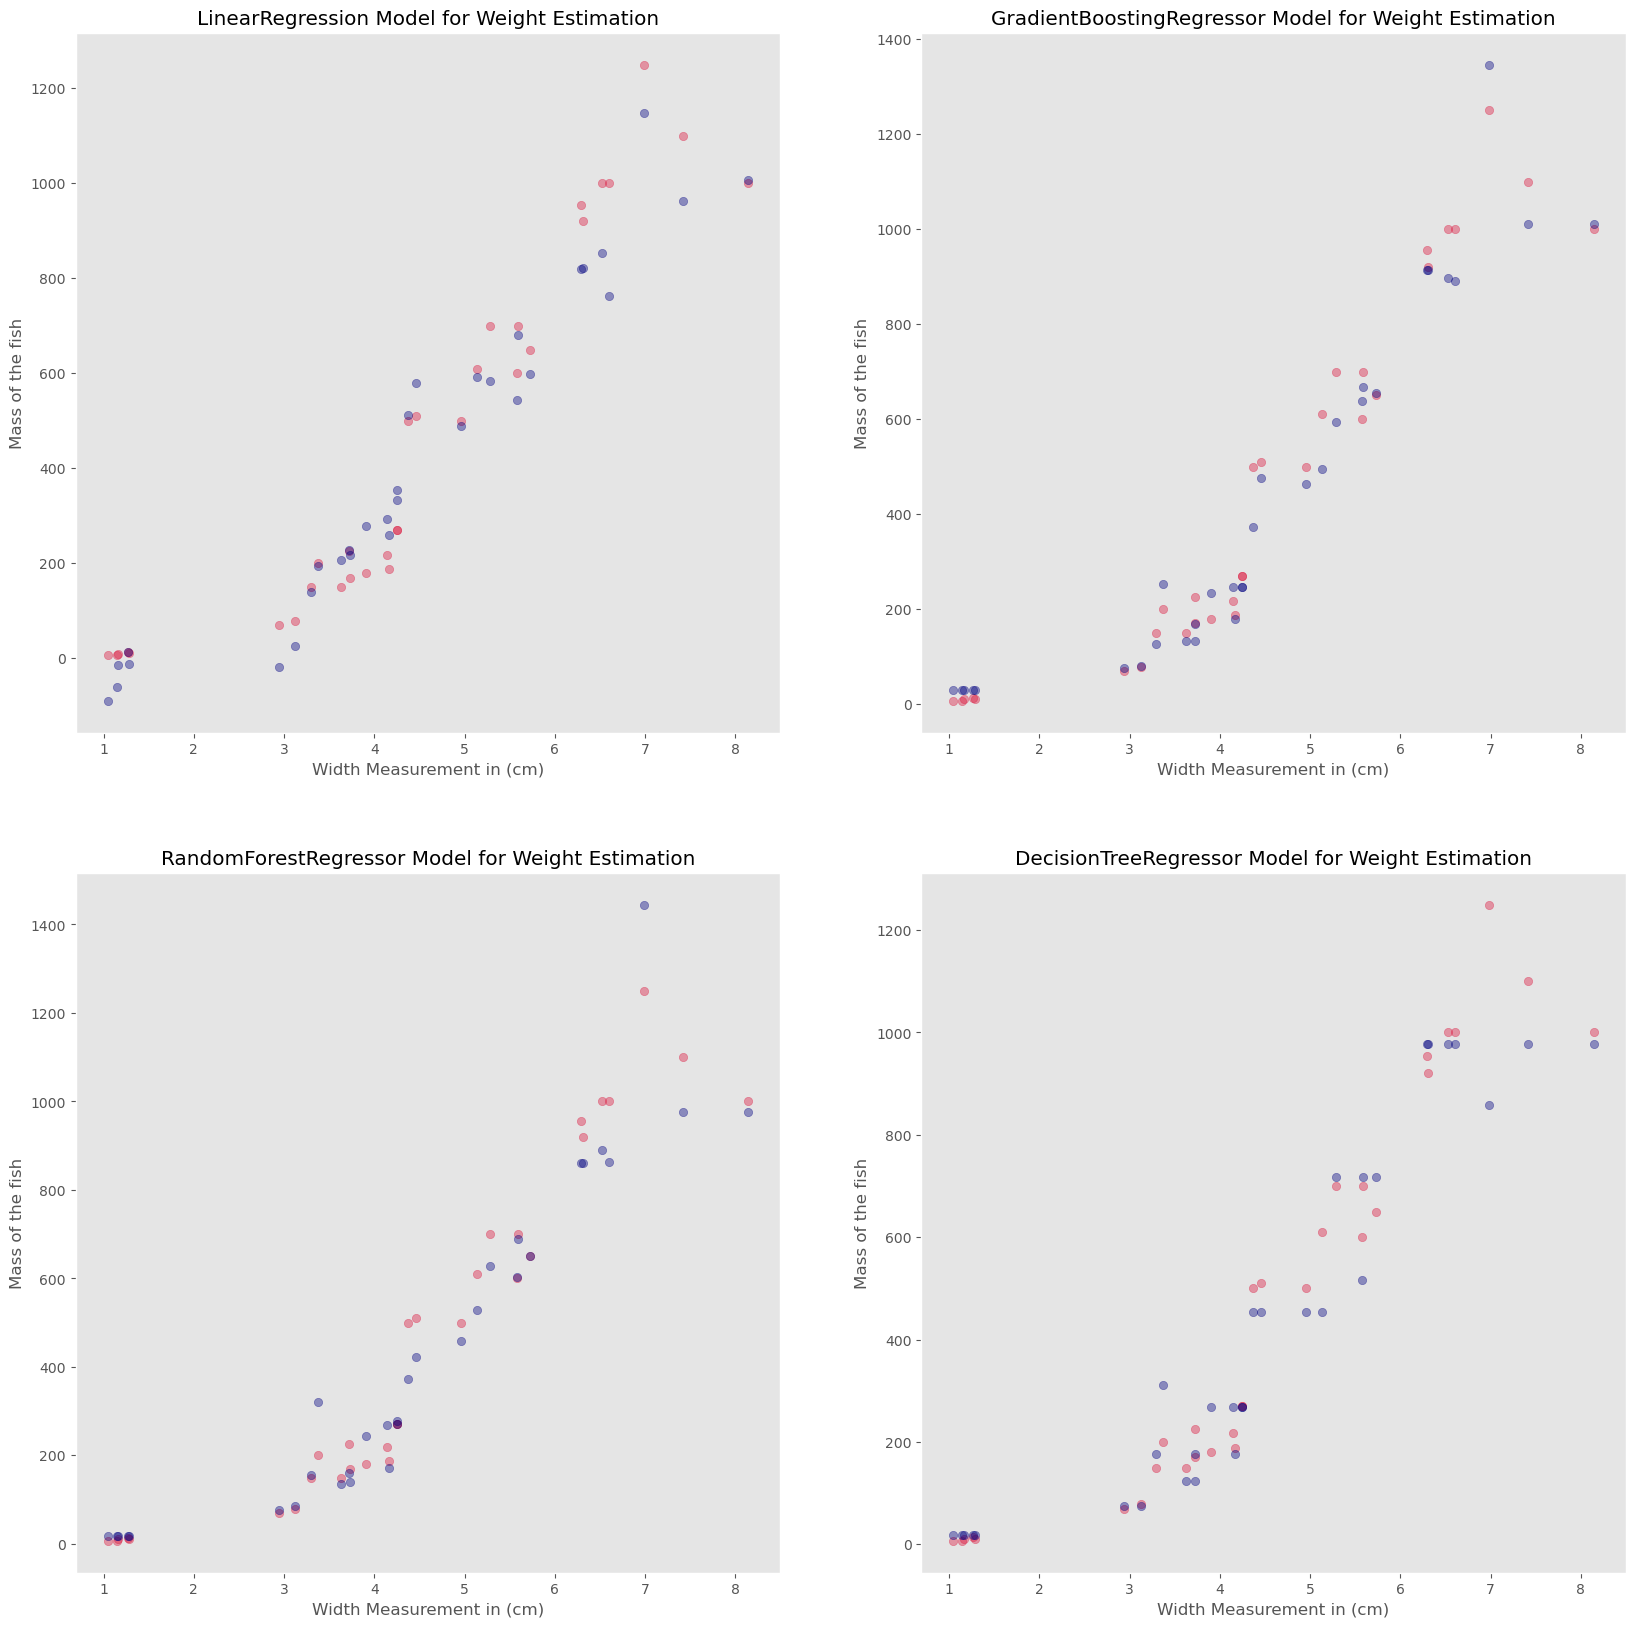

In [98]:
models('width_(cm)')

<div class="alert alert-block alert-info">
<b>Analysis:</b> The Adjusted R-squared score for all the regression model was over 0.90, concluding that over 90% of the variance of the dependent variable is explained by the variance of the independent variable. The Root Mean Square Error(RMSE) was under 88 for all the regression models. If we recall the average mass of the fish species were around 400. So, the RMSE is acceptable for these models. 
</div>